# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store;
it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review 
of the literature, theories and models have been carried out to propose the models for customer activation and customer
retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service
quality, system quality, information quality, trust and net benefit. The research furthermore investigated the
factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and
hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the 
Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

Objective:To get a deep insight on dataset and find out suitable outcomes,suggestions,conclusion using data analysis. 

In [68]:
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
#Setting option to show max rows , max columns,maximum width,max expand frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [70]:
df=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='datasheet') #loading sheet 1 for data analysis
df

1Gender of respondent 2 How old are you?  3 Which city do you shop online from?  4 What is the Pin Code of where you shop online from? 5 Since How Long You are Shopping Online ? 6 How many times you have made an online purchase in the past 1 year? 7 How do you access the internet while shopping on-line? 8 Which device do you use to access the online shopping? 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                         10 What is the operating system (OS) of your device?\t\t\t\t                                           11 What browser do you run on your device to access the website?\t\t\t                                                           12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                    13 After first visit, how do you reach the online retail store?\t\t\t\t                                                    14 How much time do you explore the e- retail store before making a purchase decision?                                                                    15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                    17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                        18 The content on the website must be easy to read and understand 19 Information on similar product to the one highlighted  is important for product comparison 20 Complete information on listed seller and product being offered is important for purchase decision. 21 All relevant information on listed products must be stated clearly 22 Ease of navigation in website 23 Loading and processing speed 24 User friendly Interface of the website 25 Convenient Payment methods 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time 27 Empathy (readiness to assist with queries) towards the customers 28 Being able to guarantee the privacy of the customer 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) 30 Online shopping gives monetary benefit and discounts 31 Enjoyment is derived from shopping online 32 Shopping online is convenient and flexible 33 Return and replacement policy of the e-tailer is important for purchase decision 34 Gaining access to loyalty programs is a benefit of shopping online 35 Displaying quality Information on the website improves satisfaction of customers 36 User derive satisfaction while shopping on a good quality website or application 37 Net Benefit derived from shopping online can lead to users satisfaction 38 User satisfaction cannot exist without trust 39 Offering a wide variety of listed product in several category 40 Provision of complete and relevant product information 41 Monetary savings 42 The Convenience of patronizing the online retailer 43 Shopping on the website gives you the sense of adventure 44 Shopping on your preferred e-tailer enhances your social status 45 You feel gratification shopping on your favorite e-tailer 46 Shopping on the website helps you fulfill certain roles 47 Getting value for money spent From the following, tick any (or all) of the online retailers you have shopped from;                                                                                            Easy to use website or application                   Visual appealing web-page layout                   Wild variety of product on offer Complete, relevant description information of products Fast loading website speed of website and application          Re

Thus we can see tab spaces,\t so we need to remove it to be more identifiable.

In [4]:
df.shape #there are 269 rows and 71 columns  in the dataset

(269, 71)

In [5]:
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [6]:
df.columns   #Checking out the columns of the dataset

Index(['Gender of respondent', 'How old are you?', 'Which city do you shop online from?', 'What is the Pin Code of where you shop online from?', 'Since How Long You are Shopping Online ?', 'How many times you have made an online purchase in the past  year?', 'How do you access the internet while shopping on-line?', 'Which device do you use to access the online shopping?', 'What is the screen size of your mobile device?', 'What is the operating system (OS) of your device?', 'What browser do you run on your device to access the website?', 'Which channel did you follow to arrive at your favorite online store for the first time?', 'After first visit, how do you reach the online retail store?', 'How much time do you explore the e- retail store before making a purchase decision?', 'What is your preferred payment Option?', 'How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', 'Why did you abandon the “Bag”, “Shopping Cart”?',
       'The 

In [7]:
df.dtypes #checking datatypes

Gender of respondent                                                                                         object
How old are you?                                                                                             object
Which city do you shop online from?                                                                          object
What is the Pin Code of where you shop online from?                                                           int64
Since How Long You are Shopping Online ?                                                                     object
How many times you have made an online purchase in the past  year?                                           object
How do you access the internet while shopping on-line?                                                       object
Which device do you use to access the online shopping?                                                       object
What is the screen size of your mobile device?                          

In [8]:
df.head() #display first 5 rows of the dataset

Gender of respondent How old are you? Which city do you shop online from?  What is the Pin Code of where you shop online from? Since How Long You are Shopping Online ? How many times you have made an online purchase in the past  year? How do you access the internet while shopping on-line? Which device do you use to access the online shopping? What is the screen size of your mobile device? What is the operating system (OS) of your device? What browser do you run on your device to access the website? Which channel did you follow to arrive at your favorite online store for the first time? After first visit, how do you reach the online retail store? How much time do you explore the e- retail store before making a purchase decision? What is your preferred payment Option? How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart? Why did you abandon the “Bag”, “Shopping Cart”? The content on the website must be easy to read and understand Information on similar product to the one highlighted  is important for product comparison Complete information on listed seller and product being offered is important for purchase decision. All relevant information on listed products must be stated clearly Ease of navigation in website Loading and processing speed User friendly Interface of the website Convenient Payment methods Trust that the online retail store will fulfill its part of the transaction at the stipulated time Empathy (readiness to assist with queries) towards the customers Being able to guarantee the privacy of the customer Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) Online shopping gives monetary benefit and discounts Enjoyment is derived from shopping online Shopping online is convenient and flexible Return and replacement policy of the e-tailer is important for purchase decision Gaining access to loyalty programs is a benefit of shopping online Displaying quality Information on the website improves satisfaction of customers User derive satisfaction while shopping on a good quality website or application Net Benefit derived from shopping online can lead to users satisfaction User satisfaction cannot exist without trust Offering a wide variety of listed product in several category Provision of complete and relevant product information    Monetary savings The Convenience of patronizing the online retailer Shopping on the website gives you the sense of adventure Shopping on your preferred e-tailer enhances your social status You feel gratification shopping on your favorite e-tailer Shopping on the website helps you fulfill certain roles Getting value for money spent From the following, tick any (or all) of the online retailers you have shopped from;                 Easy to use website or application                   Visual appealing web-page layout Wild variety of product on offer Complete, relevant description information of products Fast loading website speed of website and application Reliability of the website or application                     Quickness to complete purchase            Availability of several payment options                  Speedy order delivery    Privacy of customers’ information Security of customer financial information              Perceived Trustworthiness Presence of online assistance through multi-channel Longer time to get logged in (promotion, sales period) Longer time in displaying graphics and photos (promotion, sales period) Late declaration of price (promotion, sales period) Longer page loading time (promotion, sales period) Limited mode of payment on most products (promotion, sales period) Longer delivery period Change in website/Application design Frequent disruption when moving from one page to another   Website is as efficient as before Which of the Indian online retailer would you recommend to a friend?
0                 Male      31-40 years                               Delhi        

In [8]:
df.head() #display first 5 rows of the dataset

Gender of respondent How old are you? Which city do you shop online from?  What is the Pin Code of where you shop online from? Since How Long You are Shopping Online ? How many times you have made an online purchase in the past  year? How do you access the internet while shopping on-line? Which device do you use to access the online shopping? What is the screen size of your mobile device? What is the operating system (OS) of your device? What browser do you run on your device to access the website? Which channel did you follow to arrive at your favorite online store for the first time? After first visit, how do you reach the online retail store? How much time do you explore the e- retail store before making a purchase decision? What is your preferred payment Option? How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart? Why did you abandon the “Bag”, “Shopping Cart”? The content on the website must be easy to read and understand Information on similar product to the one highlighted  is important for product comparison Complete information on listed seller and product being offered is important for purchase decision. All relevant information on listed products must be stated clearly Ease of navigation in website Loading and processing speed User friendly Interface of the website Convenient Payment methods Trust that the online retail store will fulfill its part of the transaction at the stipulated time Empathy (readiness to assist with queries) towards the customers Being able to guarantee the privacy of the customer Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) Online shopping gives monetary benefit and discounts Enjoyment is derived from shopping online Shopping online is convenient and flexible Return and replacement policy of the e-tailer is important for purchase decision Gaining access to loyalty programs is a benefit of shopping online Displaying quality Information on the website improves satisfaction of customers User derive satisfaction while shopping on a good quality website or application Net Benefit derived from shopping online can lead to users satisfaction User satisfaction cannot exist without trust Offering a wide variety of listed product in several category Provision of complete and relevant product information    Monetary savings The Convenience of patronizing the online retailer Shopping on the website gives you the sense of adventure Shopping on your preferred e-tailer enhances your social status You feel gratification shopping on your favorite e-tailer Shopping on the website helps you fulfill certain roles Getting value for money spent From the following, tick any (or all) of the online retailers you have shopped from;                 Easy to use website or application                   Visual appealing web-page layout Wild variety of product on offer Complete, relevant description information of products Fast loading website speed of website and application Reliability of the website or application                     Quickness to complete purchase            Availability of several payment options                  Speedy order delivery    Privacy of customers’ information Security of customer financial information              Perceived Trustworthiness Presence of online assistance through multi-channel Longer time to get logged in (promotion, sales period) Longer time in displaying graphics and photos (promotion, sales period) Late declaration of price (promotion, sales period) Longer page loading time (promotion, sales period) Limited mode of payment on most products (promotion, sales period) Longer delivery period Change in website/Application design Frequent disruption when moving from one page to another   Website is as efficient as before Which of the Indian online retailer would you recommend to a friend?
0                 Male      31-40 years                               Delhi        

In [9]:
# description of the categorcal features
df.describe(include=np.object).T

count unique                                                top freq
Gender of respondent                                 269      2                                             Female  181
How old are you?                                     269      5                                        31-40 years   81
Which city do you shop online from?                  269     11                                              Delhi   58
Since How Long You are Shopping Online ?             269      5                                      Above 4 years   98
How many times you have made an online purchase...   269      6                                 Less than 10 times  114
How do you access the internet while shopping o...   269      4                                    Mobile internet  142
Which device do you use to access the online sh...   269      4                                         Smartphone  141
What is the screen size of your mobile device?       269      4                                             Others  134
What is the operating system (OS) of your device?    269      3                              Window/windows Mobile  122
What browser do you run on your device to acces...   269      4                                      Google chrome  216
Which channel did you follow to arrive at your ...   269      3                                      Search Engine  230
After first visit, how do you reach the online ...   269      5                                      Search Engine   87
How much time do you explore the e- retail stor...   269      5                                  more than 15 mins  123
What is your preferred payment Option?               269      3                                 Credit/Debit cards  148
How frequently do you abandon (selecting an ite...   269      4                                          Sometimes  171
Why did you abandon the “Bag”, “Shopping Cart”?      269      5                           Better alternative offer  133
The content on the website must be easy to read...   269      4                                 Strongly agree (5)  164
Information on similar product to the one highl...   269      4                                 Strongly agree (5)  116
Complete information on listed seller and produ...   269      5                                          Agree (4)  101
All relevant information on listed products mus...   269      4                                          Agree (4)  132
Ease of navigation in website                        269      4                                 Strongly agree (5)  141
Loading and processing speed                         269      5                                 Strongly agree (5)  115
User friendly Interface of the website               269      5                                 Strongly agree (5)  189
Convenient Payment methods                           269      3                                 Strongly agree (5)  159
Trust that the online retail store will fulfill...   269      4                                 Strongly agree (5)  141
Empathy (readiness to assist with queries) towa...   269      4                                 Strongly agree (5)  194
Being able to guarantee the privacy of the cust...   269      3                                 Strongly agree (5)  185
Responsiveness, availability of several communi...   269      4                                 Strongly agree (5)  149
Online shopping gives monetary benefit and disc...   269      5                                 Strongly agree (5)  105
Enjoyment is derived from shopping online            269      5                                 Strongly agree (5)   86
Shopping online is convenient and flexible           269      4                                 Strongly agree (5)  146
Return and replacement policy of the e-tailer i...   269      3                                 Strongly agree (5)  198
Gaining access to loyalty programs is a benefit...   269      5                            

Observation:

1.The count column is same,that means there is no missing value in categorical section.

2.Unique value gives the count of distinct values in each column e.g in gender column,there is male and female gender.

3.Top gives the highest counted value of the categorical values(most frequent element) like e.g female in gender column.

4.Freq means  how many times that most frequent element(Top) was seen like e.g female has respondent 181 times. 


In [10]:
# description of  numerical feautres description:
df.describe().T

count           mean            std       min       25%       50%       75%       max
What is the Pin Code of where you shop online f...  269.0  220465.747212  140524.341051  110008.0  122018.0  201303.0  201310.0  560037.0

Observation:

1.Pincode is the only int datatype present here in dataset.   

2.Count is same as categorical columns implying there is no missing value in dataset.

3.If the mean is greater than the median, the distribution is positively skewed here its positively skewed.

4.if there is gap between 75% percentile and max,then ouliers are present.

In [11]:
df.isnull().sum()   #Checking for null values in the dataset

Gender of respondent                                                                                         0
How old are you?                                                                                             0
Which city do you shop online from?                                                                          0
What is the Pin Code of where you shop online from?                                                          0
Since How Long You are Shopping Online ?                                                                     0
How many times you have made an online purchase in the past  year?                                           0
How do you access the internet while shopping on-line?                                                       0
Which device do you use to access the online shopping?                                                       0
What is the screen size of your mobile device?                                                               0
W

There is no missing value in the dataset ,so no need to apply imutation technique

<AxesSubplot:>

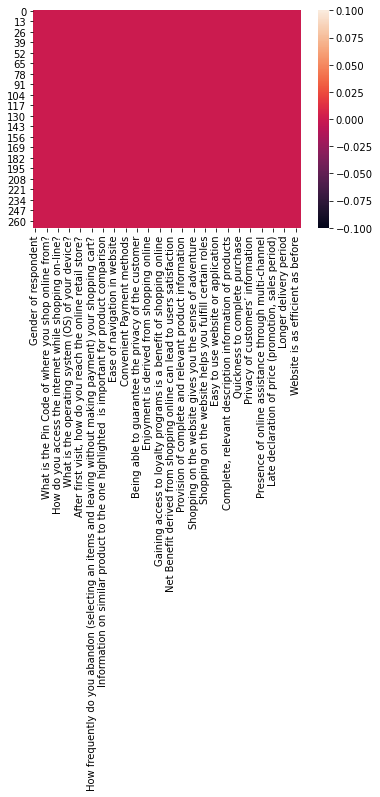

In [12]:
sns.heatmap(df.isnull()) 

The visual representation using heatmap shows there is no missing value.

In [46]:
Feedback=["The content on the website must be easy to read and understand","Information on similar product to the one highlighted  is important for product comparison",
         "Complete information on listed seller and product being offered is important for purchase decision.","All relevant information on listed products must be stated clearly",
          "Ease of navigation in website","Loading and processing speed","User friendly Interface of the website","Convenient Payment methods","Trust that the online retail store will fulfill its part of the transaction at the stipulated time",
          "Empathy (readiness to assist with queries) towards the customers","Being able to guarantee the privacy of the customer",
          
         ]

In [47]:
#checking the value count of all the features in the dataset using loop function
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("\n")

Gender of respondent
Female    181
Male       88
Name: Gender of respondent, dtype: int64


How old are you?
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: How old are you?, dtype: int64


Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which city do you shop online from?, dtype: int64


What is the Pin Code of where you shop online from?
201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304    

# Data Visualization

AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0

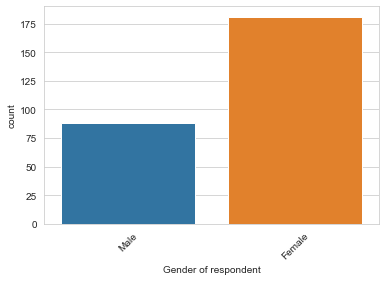

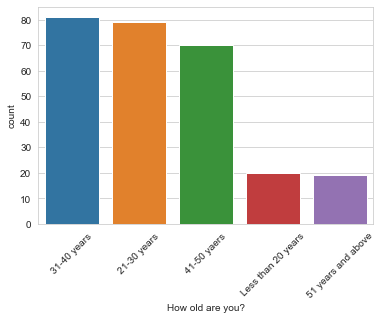

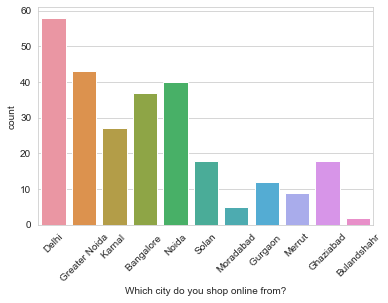

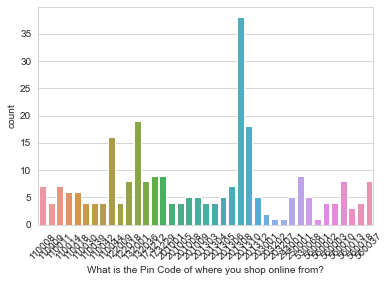

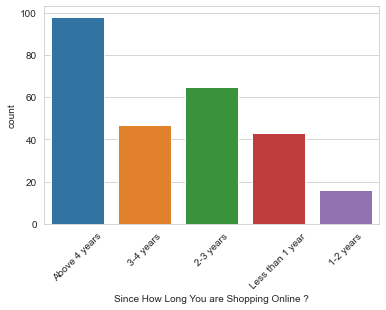

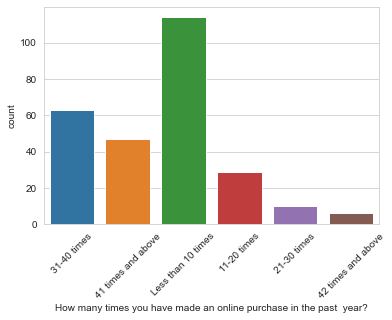

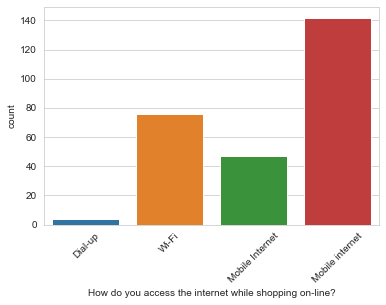

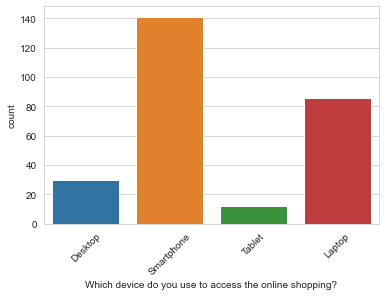

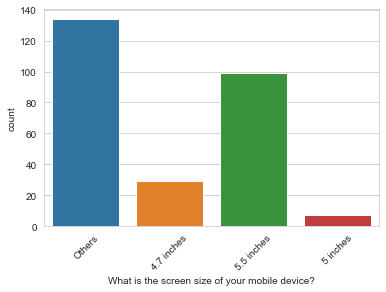

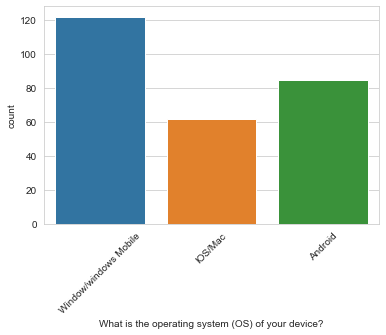

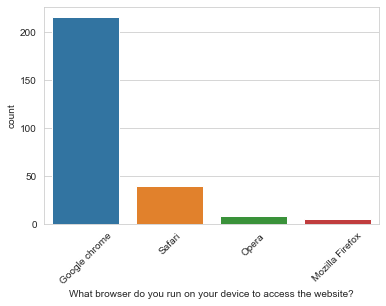

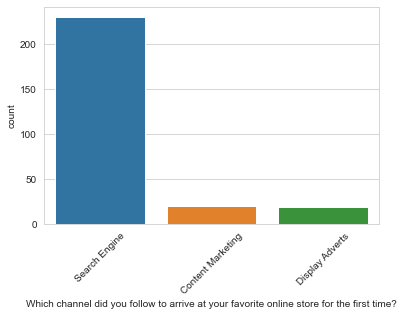

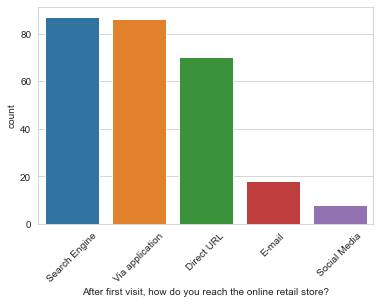

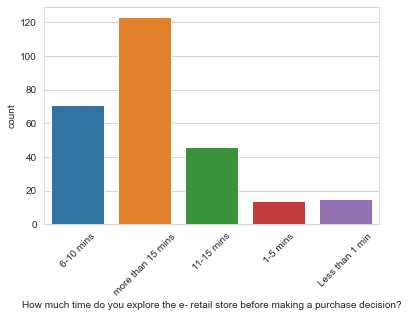

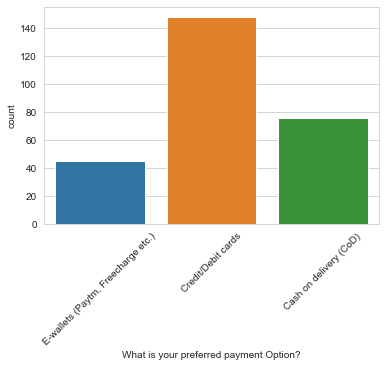

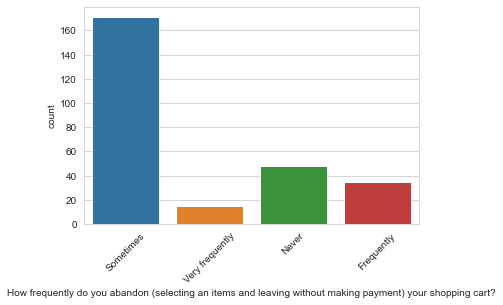

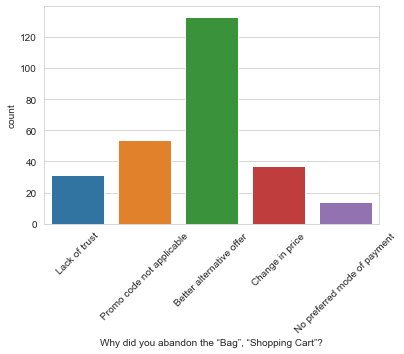

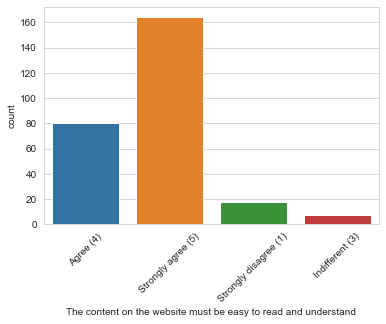

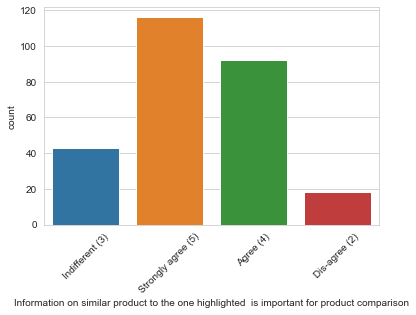

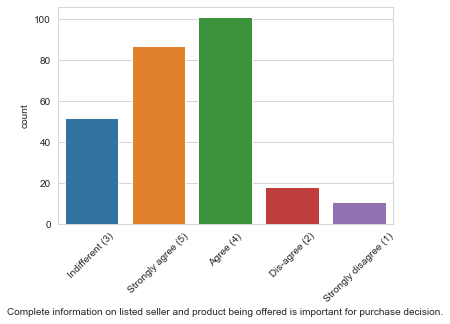

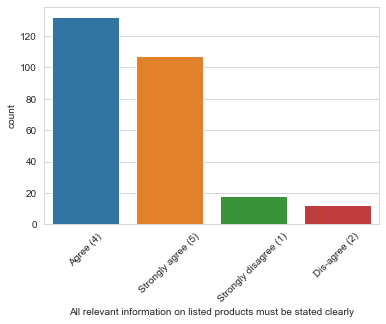

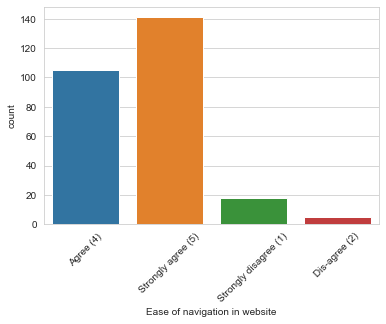

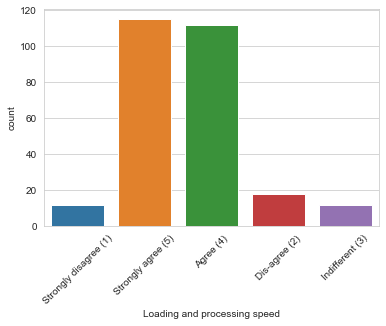

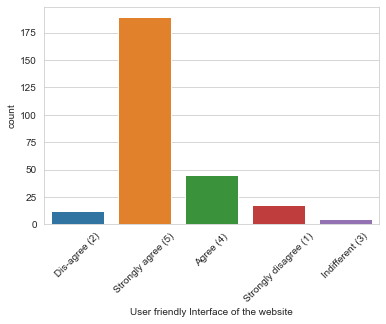

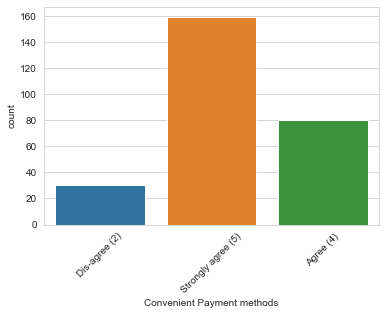

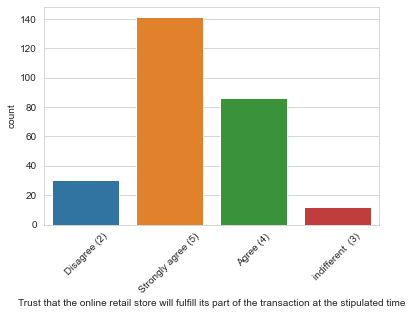

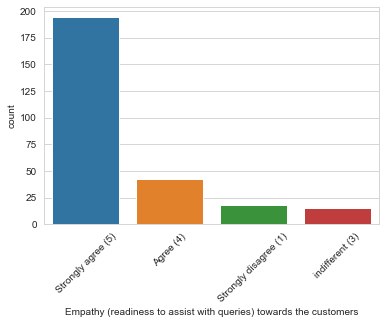

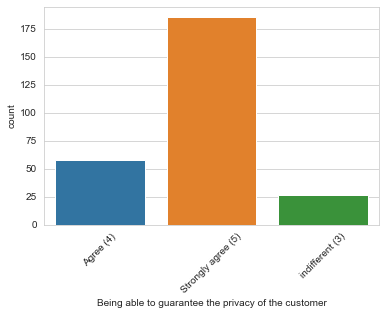

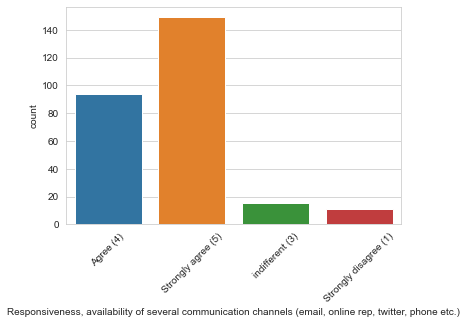

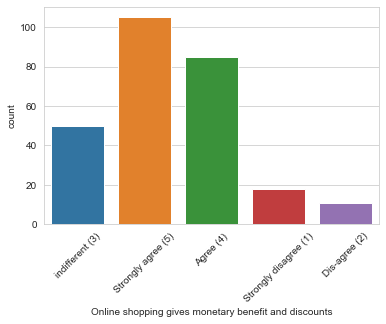

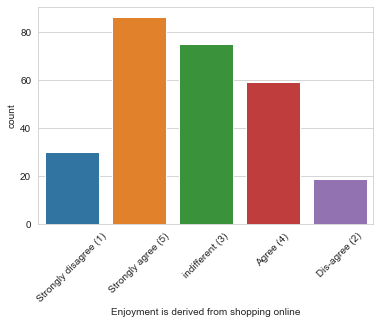

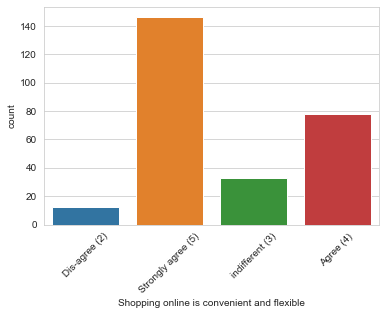

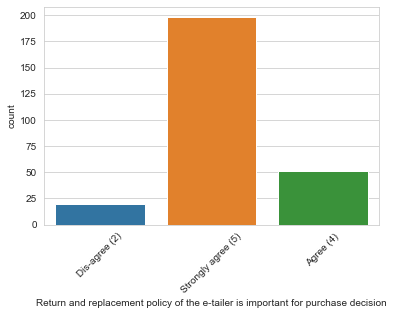

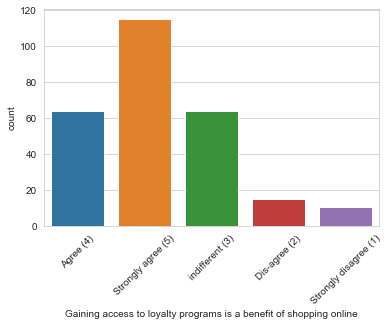

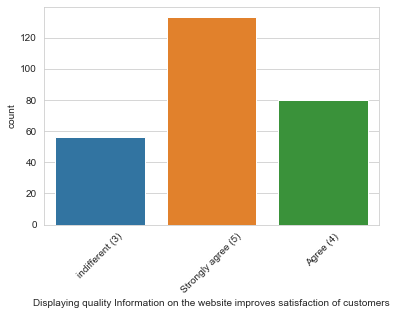

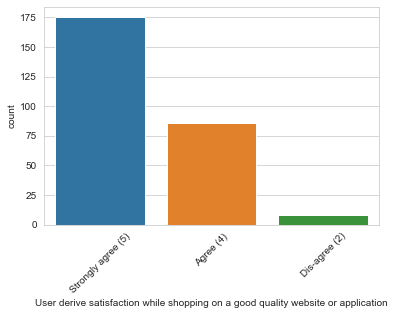

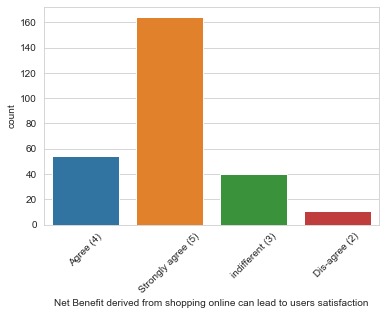

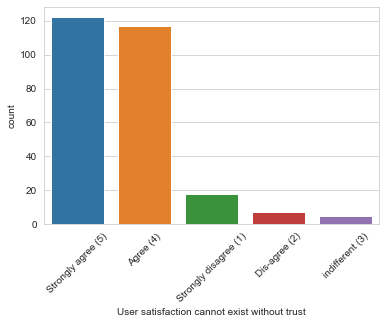

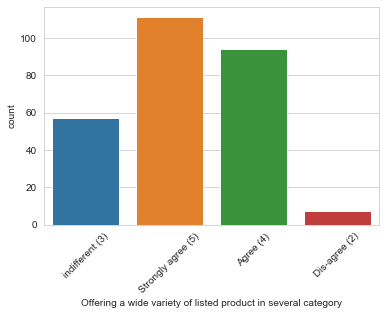

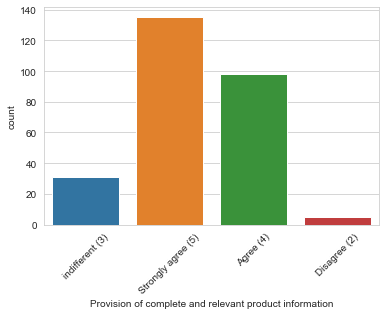

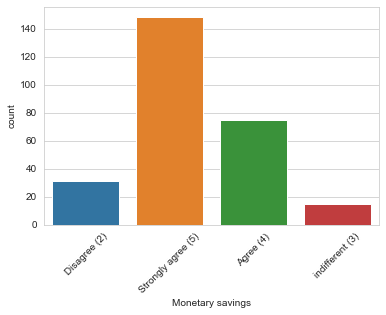

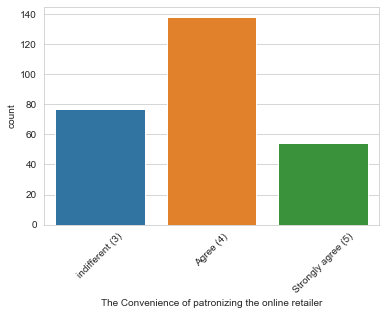

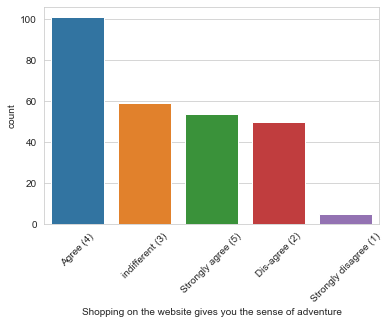

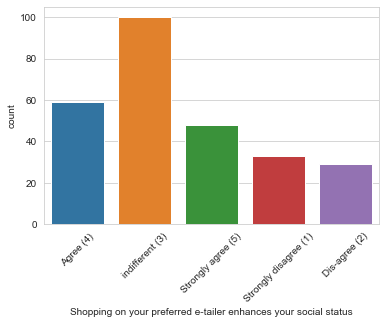

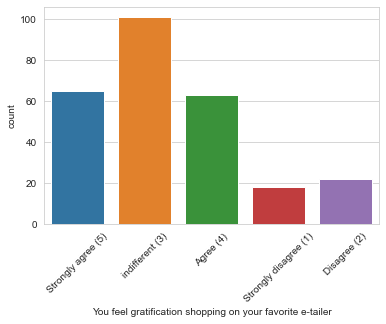

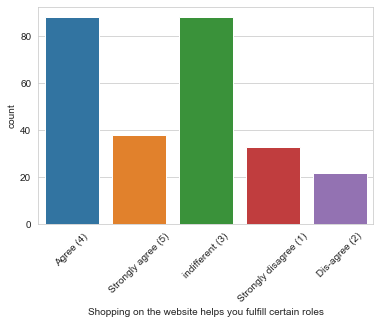

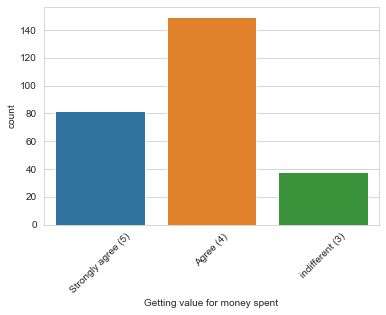

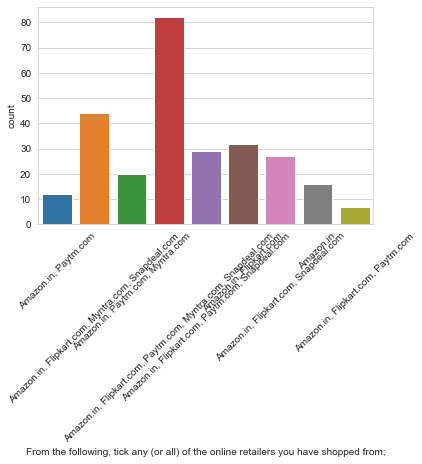

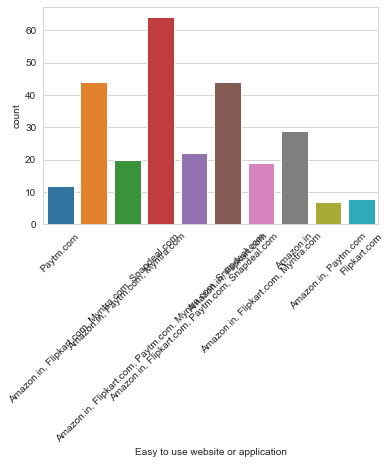

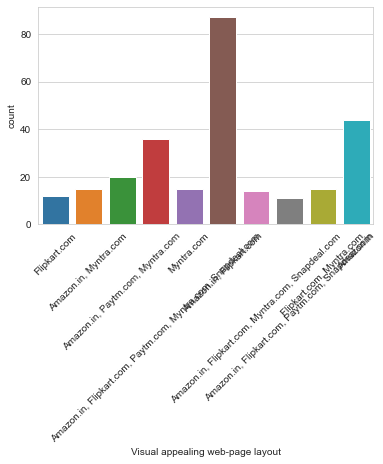

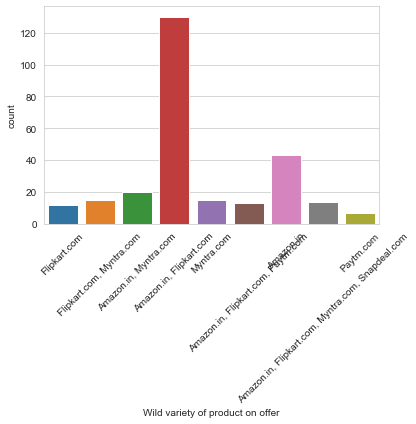

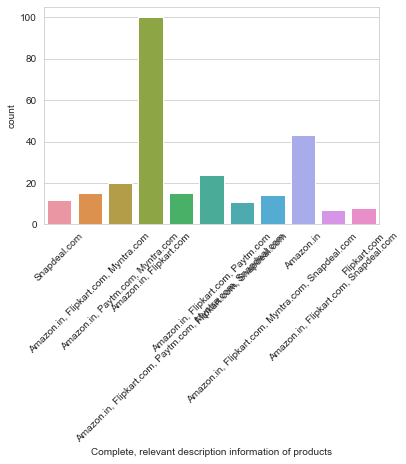

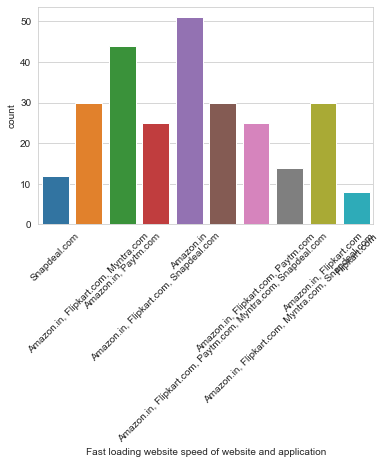

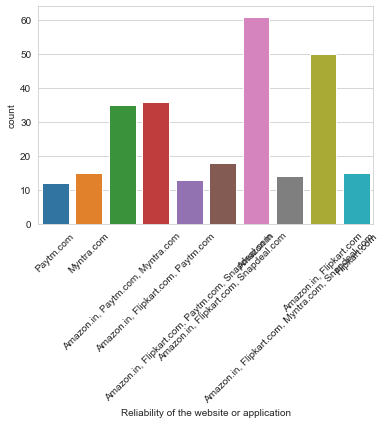

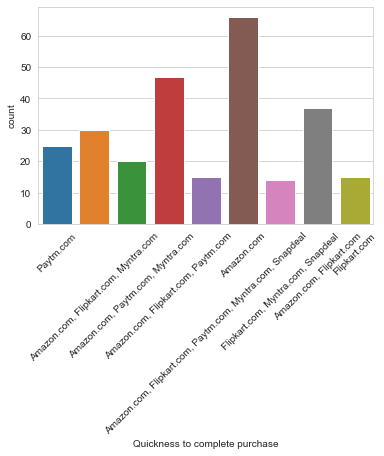

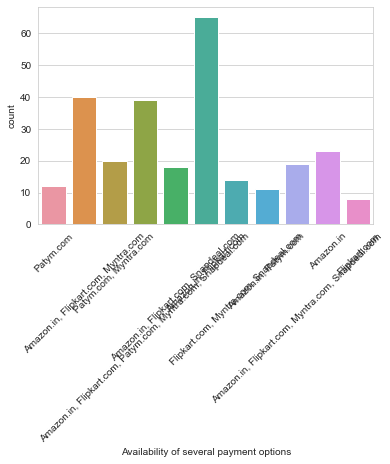

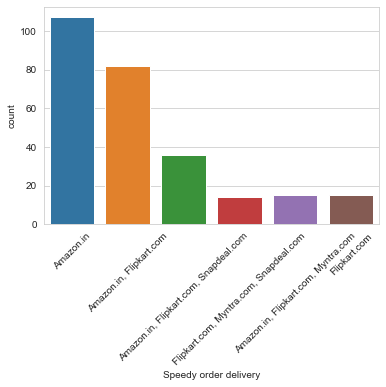

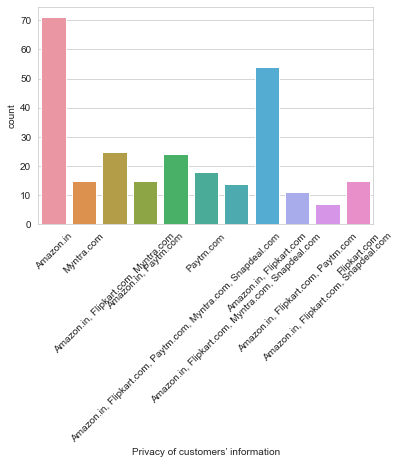

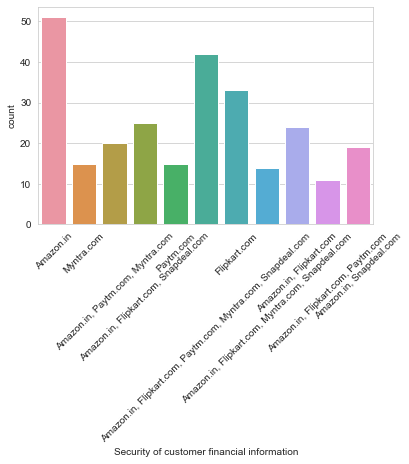

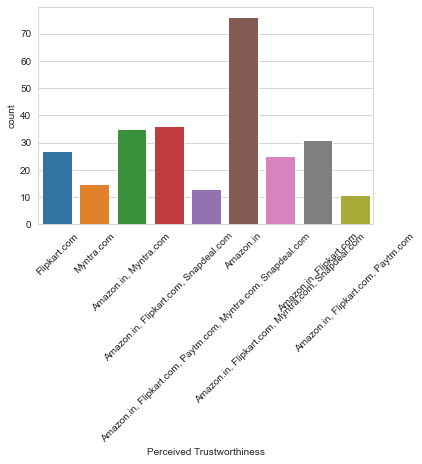

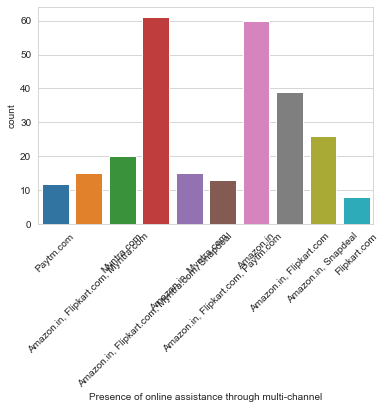

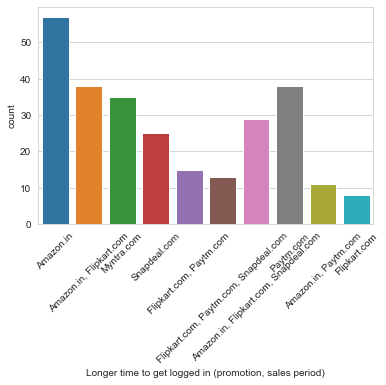

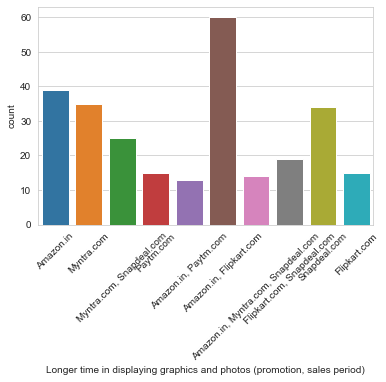

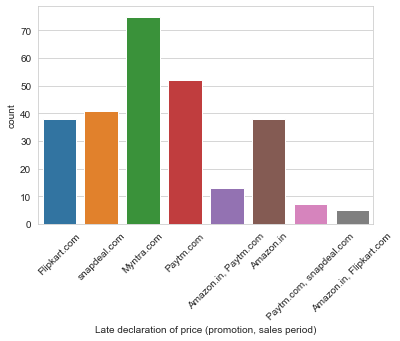

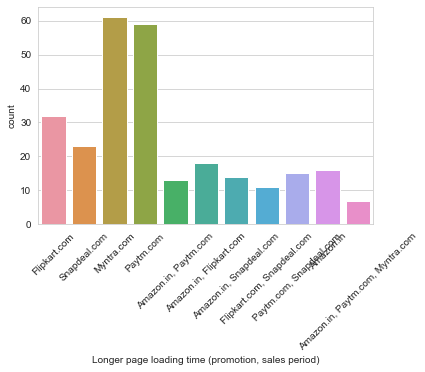

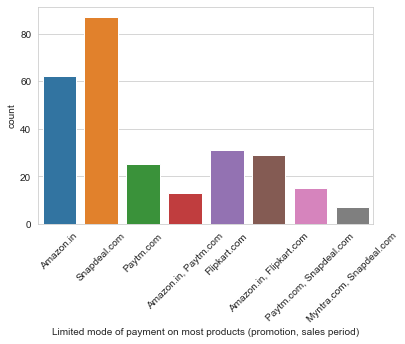

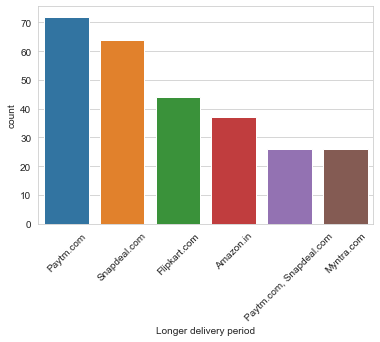

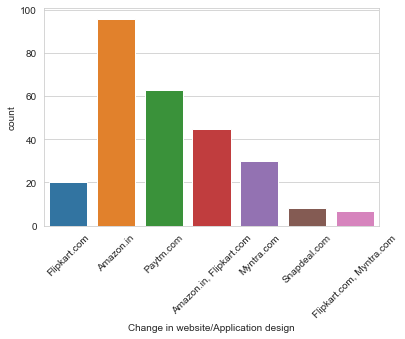

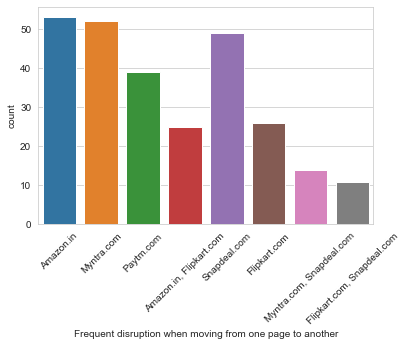

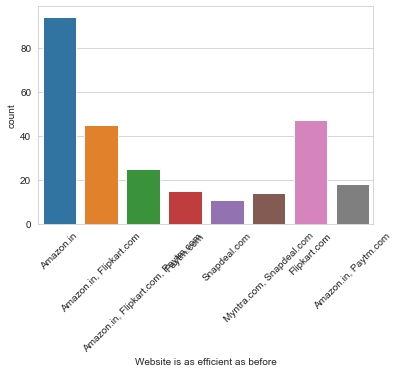

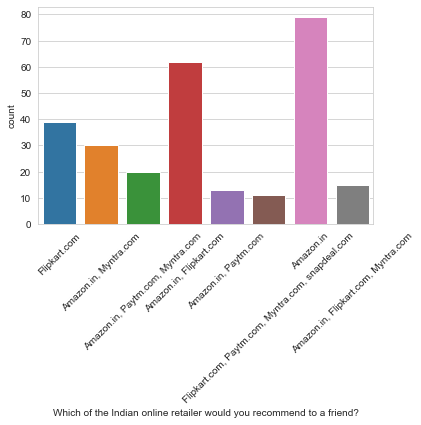

In [48]:
#Plotting countplot for all the columns present
for i in df.columns:
    plt.figure(i)
    print(sns.countplot(df[i]))
    plt.xticks(rotation=45)
    print("\n")

Findings:
1.Gender:female has respodent Maximum number than male.
    
2.Age:Age-group of 31-40yrs are maximum may be due to the fact that they belong to working class and they dont get time visit mart/shopping arae so they
order maostly online followed by 21-30yrs group then 41-50years and there is least response from 51 years
and above may be due to fact of less usage of online shoping and needs eduaction of learning online shopping by 51yrs and 
above.

3.City:The respodents are residing in cities like Delhi,Greater Noida,Karnal,Bangalore,Noida and least from Bulandshahr.
    
4.Maximum customers have been shopping online for more than 4 years and some are shopping since less than for 1 years.
So we can see new customers are entering into the online shopping mode. 

5.We can see that many peaople have shopped less than 10 times in the past year.

5.Maximum respodent using Mobile internet,followed by wifi and least is Dial-up. 

6.Max respodent uses smartphone for online shaopping which is portable,quite handy and least is tablet.

7.Screen size of the others devices using is maximum.  

8.maximum customers uses windows/windows mobile as operating system. 

9.Customers has been using google chrome the most to access the online shopping webiste and leasr is mozilla firefox.


10.Search engine is voted for maximum by customers and least is display advertisements.
So companies should spend more on advertising on search engines.

11.After first visit ,customers prefer search engine followed by application and direct url than the email and social media. 

12.customers have been exploring more than 15mins before making a purchase decsion followed by 6-10minutes.

13.Customers uses credit/debit card as the most preffered payment option than e-wallets and COD.

14.Customers 171 times(sometimes) abandon the shopping cart -that is selecting an items and
leaving without making payemnt than 15 times very frequently.People have mentioned that sometimes 
they would leave the cart without purchasing and reason they have mentioned is that they are finding 
some better alternative offer. It means that people are comparing from many online websites before making any purchase.

16.Site Design(Information Quality):Customer strongly agree that the content on the webiste must be readable and understandable.

17.Merchandising:Majority wants that the information regading similar products should be highlighted for product comparison,
compltete infm on listed seller and product being offererd for purchase decision,all the relevant information should be stated 
clearly.

18.Convience: Majority wants Ease of navigatioin in website,high Loading and processing speed,
User friendly Interface of the website. Convenient Payment methods should be focussed,Shopping online should be
convenient and flexible.

19.Security:Customer strongly agree that online retail store should fulfill its part of the transaction 
   at the stipulated time, They should protect the privacy of the customer.

20.Serviceability: Majority of the customers think that online retailers should be Empathatheic
    (readiness to assist with queries) towards the customers,Responsiveness, availability of several communication channels (email, online rep, twitter, phone et.c.),replacement policy of the e-tailer is important for purchase decision,

21.Net Benefits:Customer strongly agrees that Online shopping gives monetary benefit and discounts,
    Enjoyment is derived from shopping online,Return and Gaining access to loyalty programs,Monetary savings.

22.Charater:we see that some are agreable and some are indifferent to the fact  that shopping on the website gives 
    the sense of adventure,preferred e-tailer enhances the social status,feeling of  gratification, helps fulfill
    certain roles.

24.Choice:Majority believes that online shopping offers a wide variety of listed product in several category.

25.We can also see customers were asked to give feedbacks for five retailers namely Amazon,Flipkart,myntra,paytm,snapdeal
regarding their services/products/usability etc.they expresssed both positive and negative views on the same.    

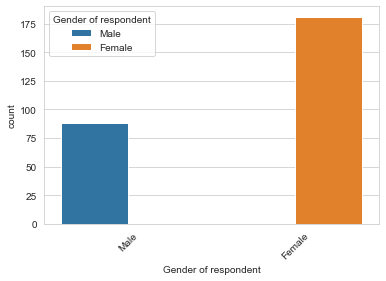

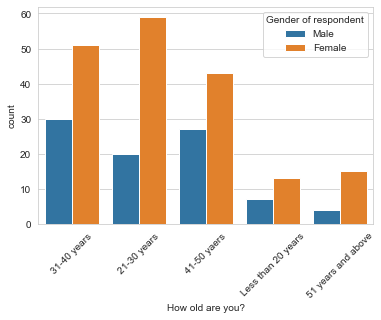

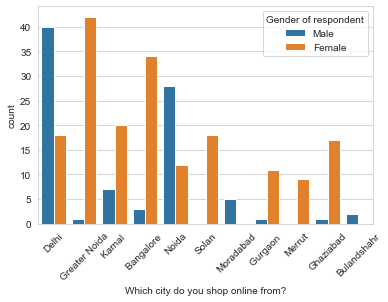

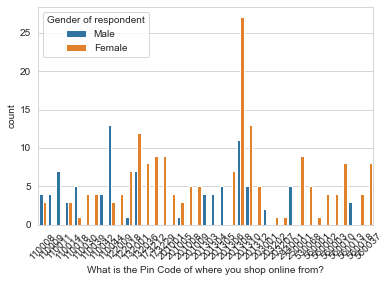

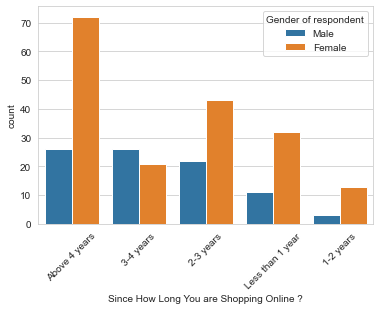

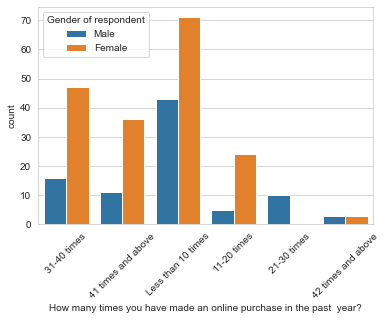

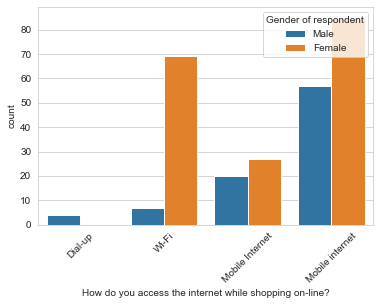

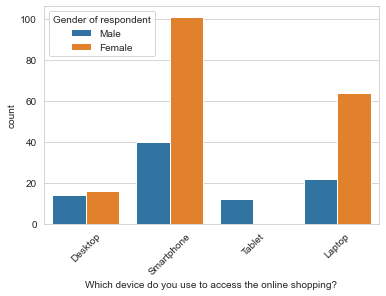

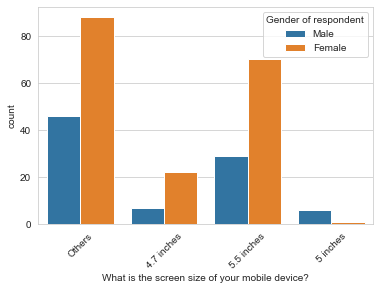

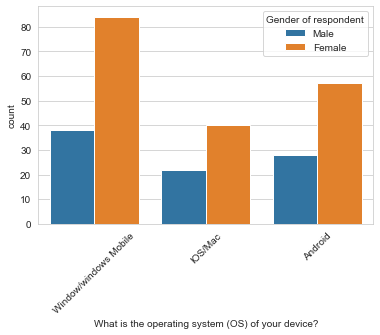

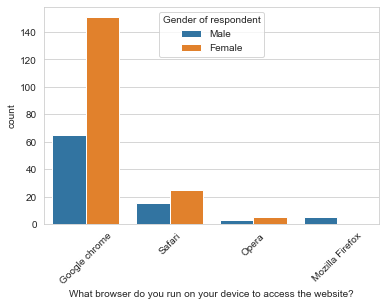

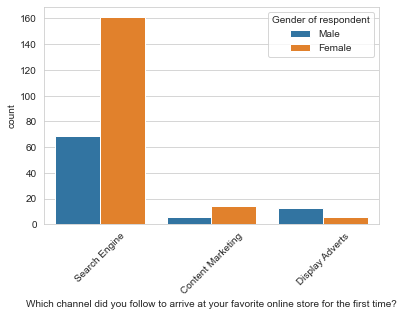

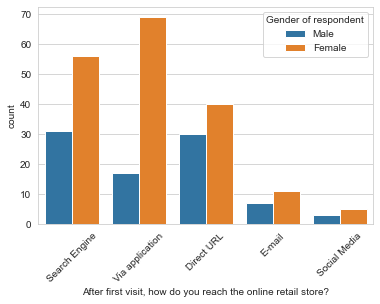

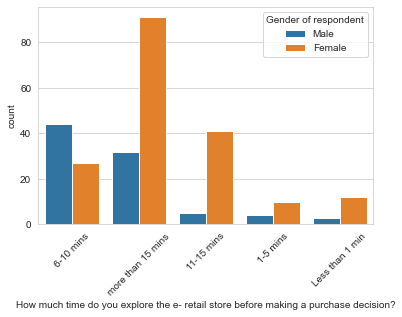

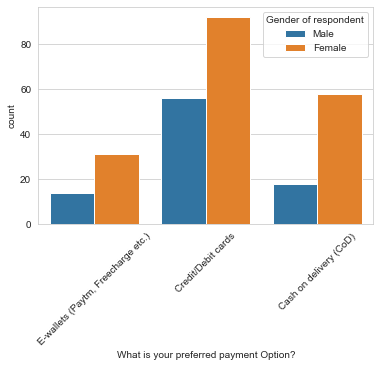

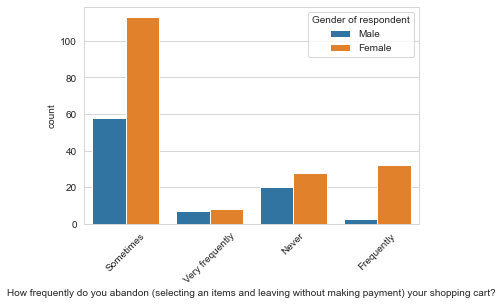

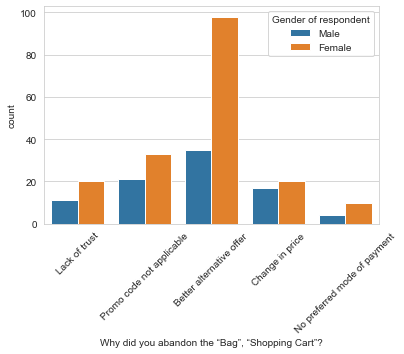

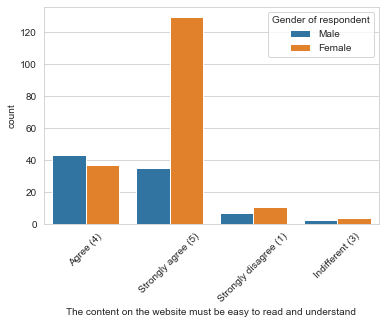

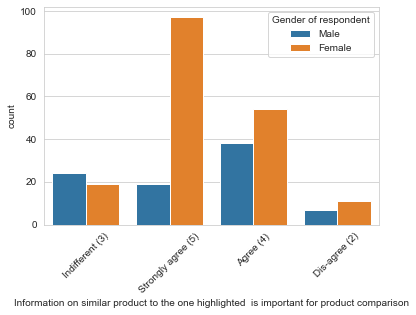

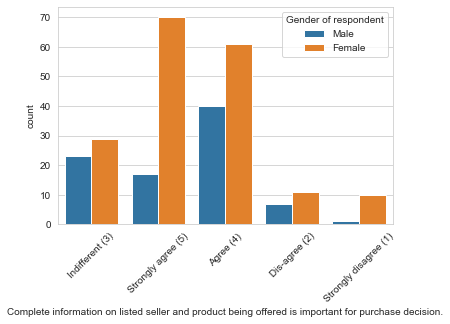

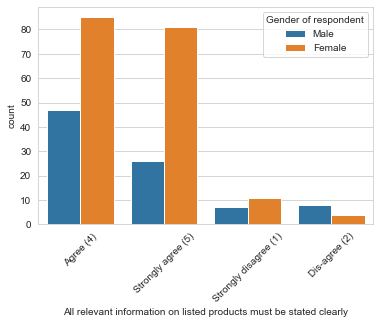

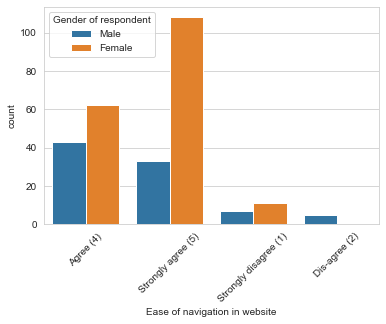

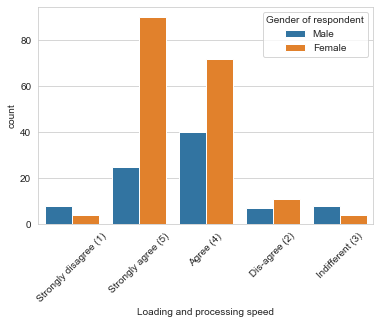

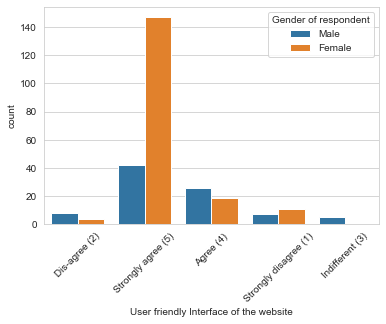

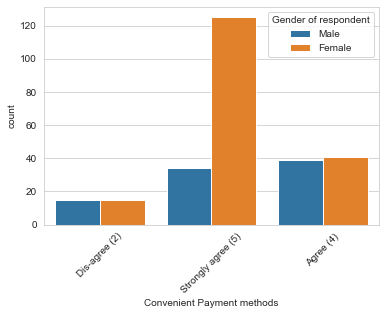

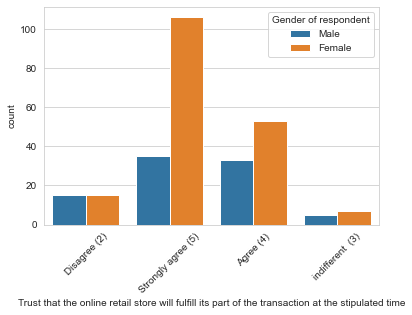

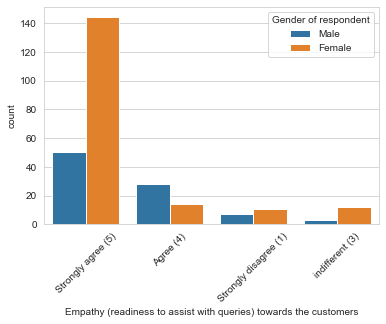

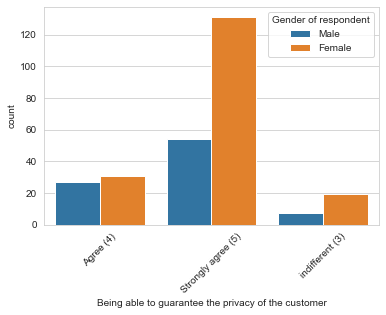

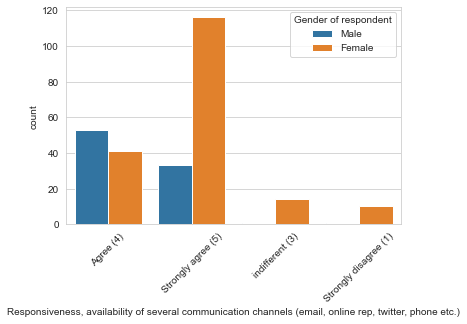

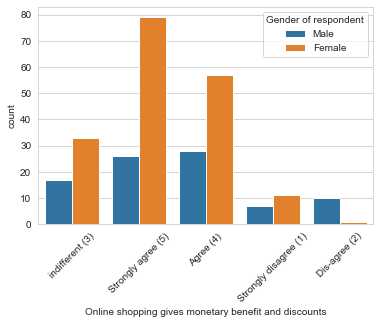

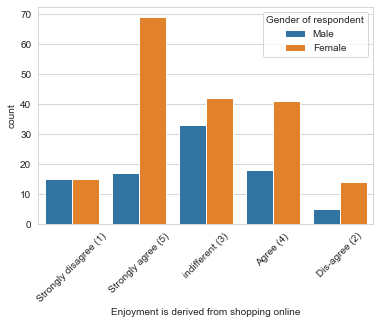

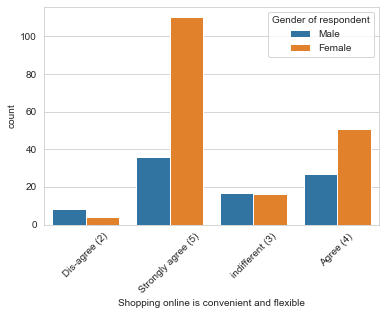

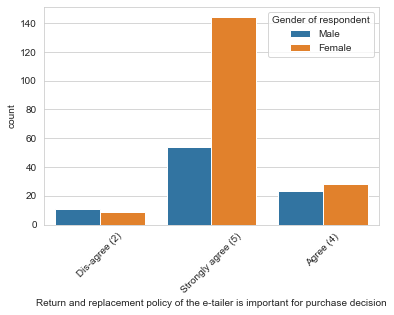

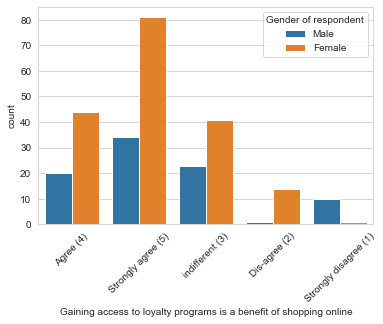

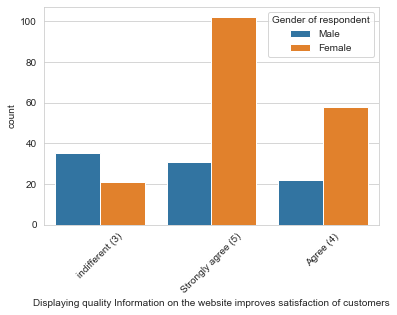

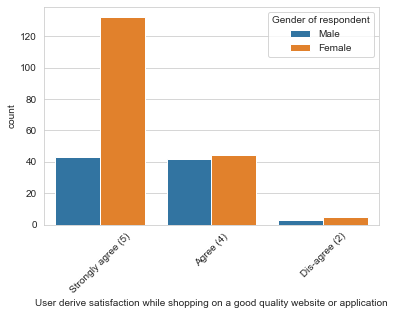

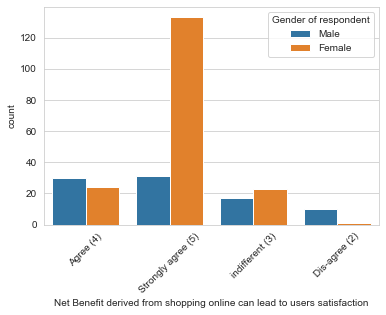

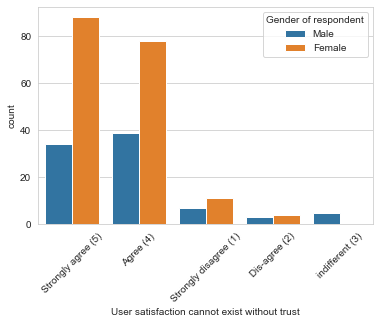

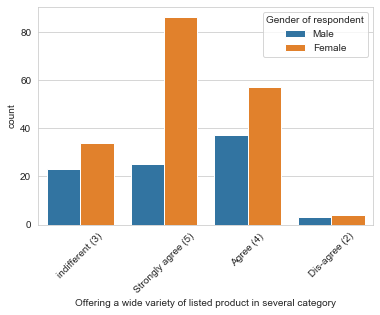

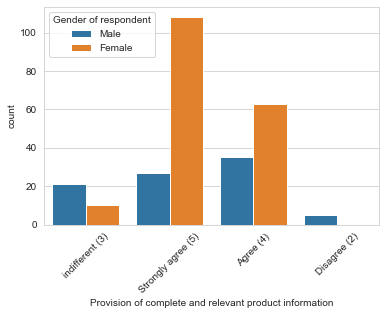

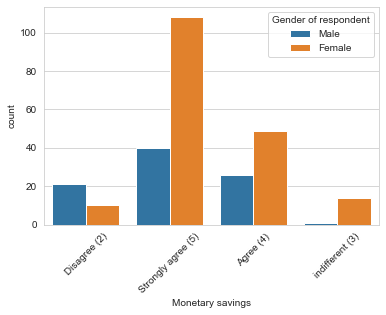

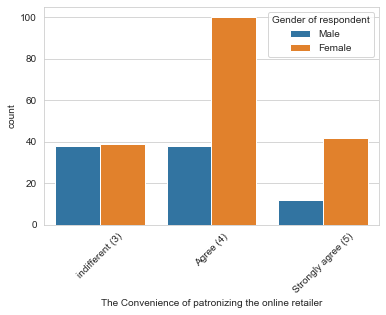

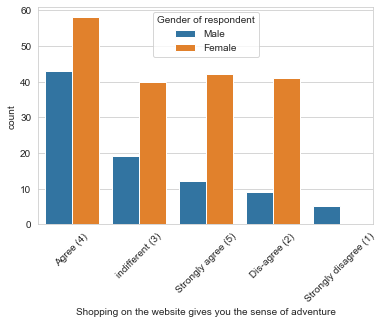

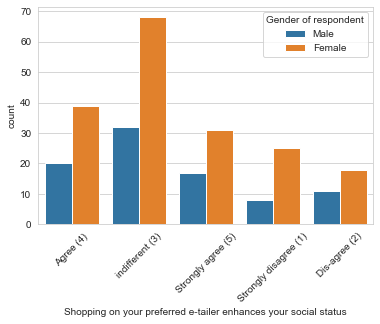

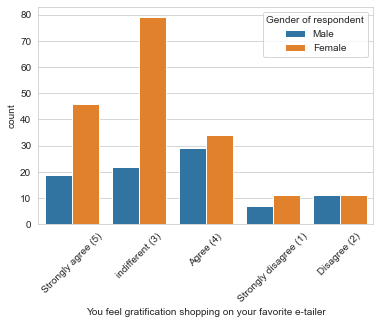

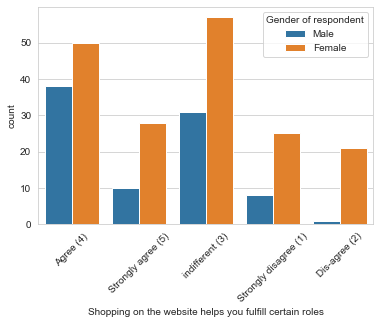

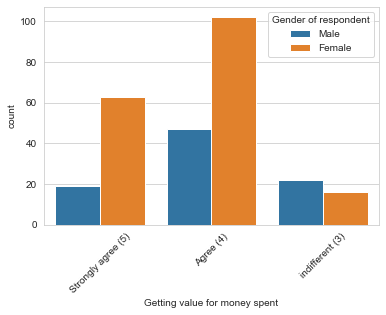

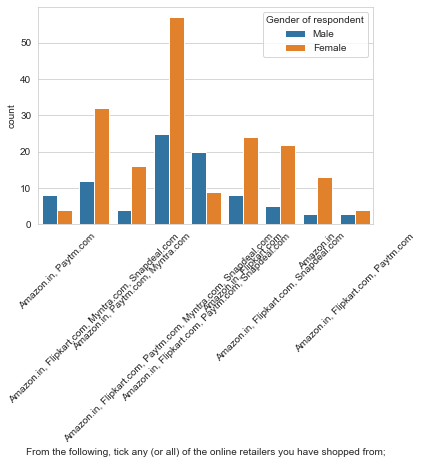

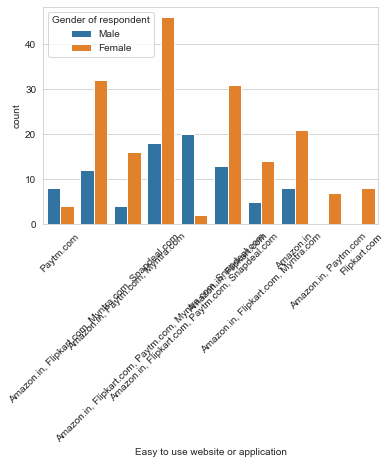

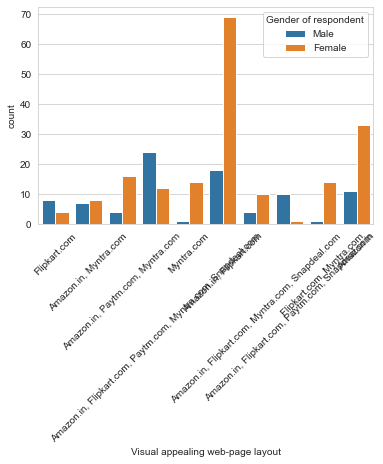

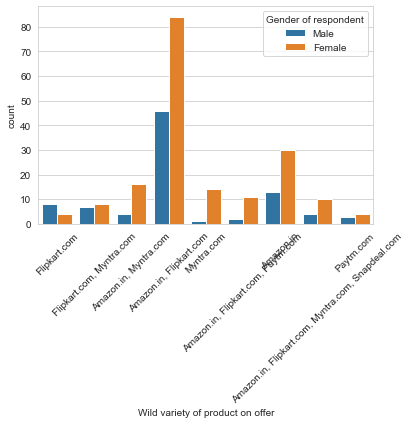

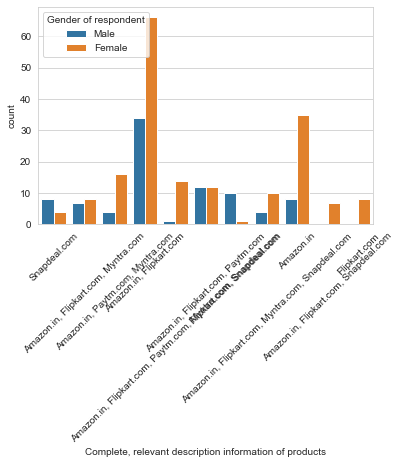

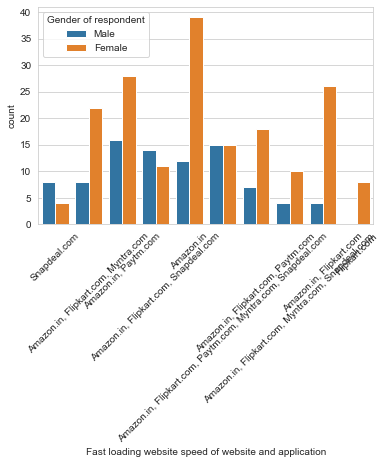

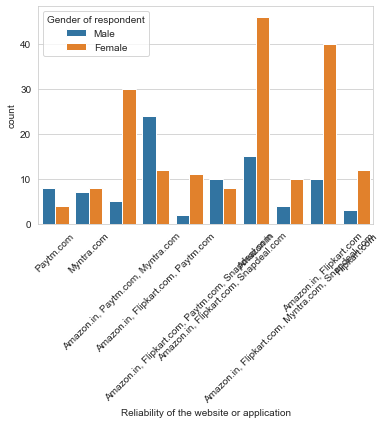

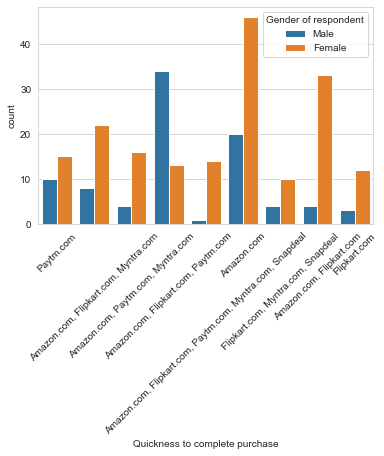

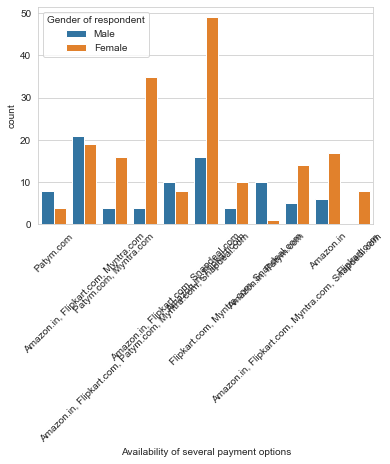

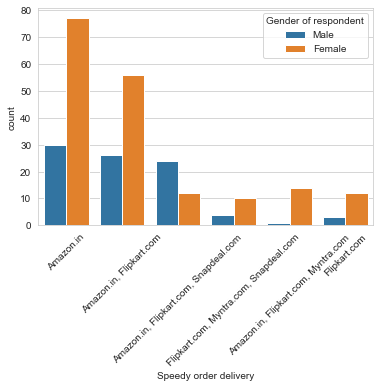

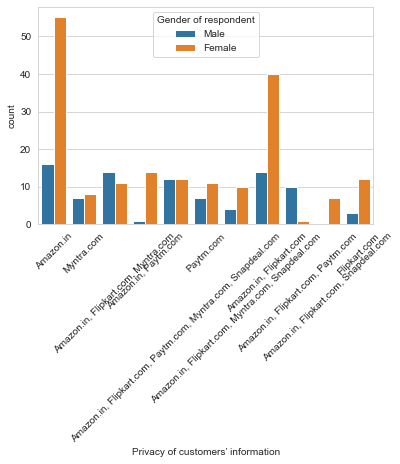

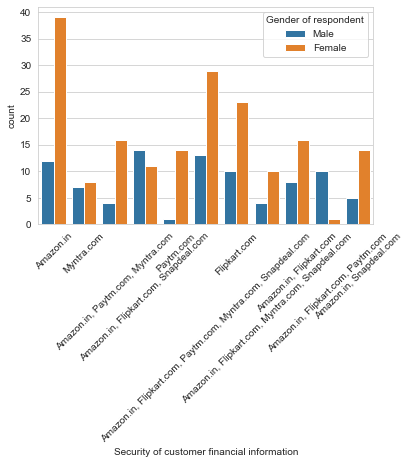

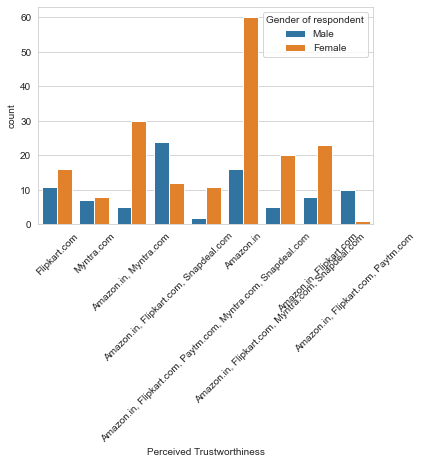

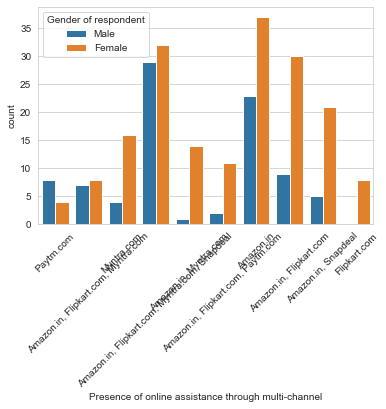

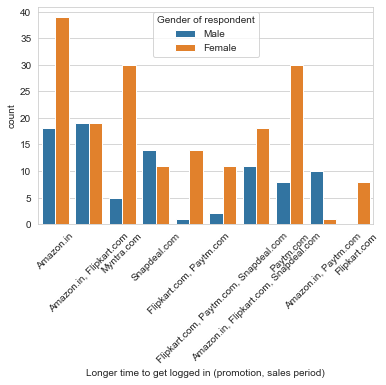

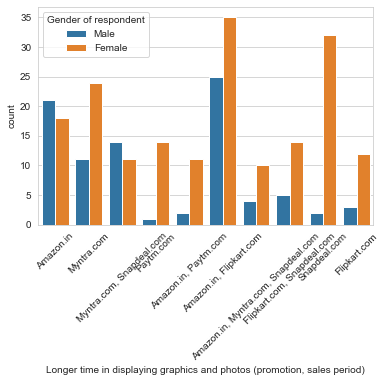

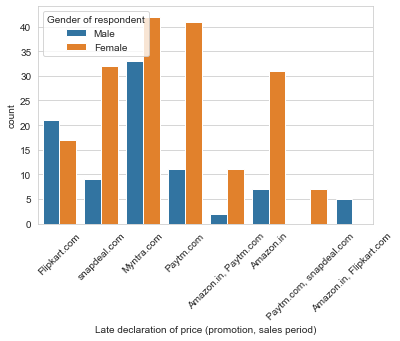

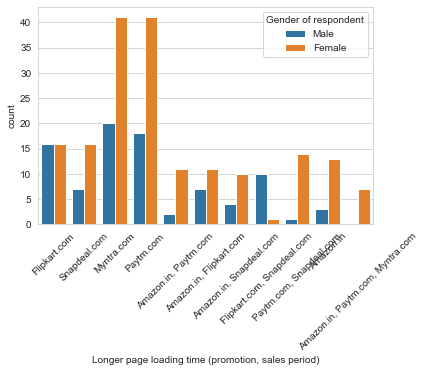

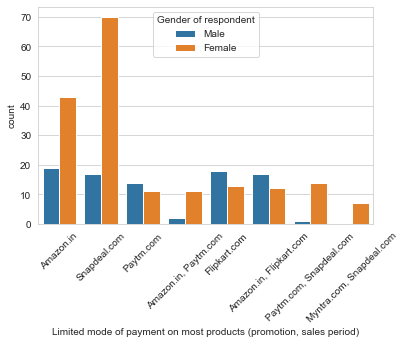

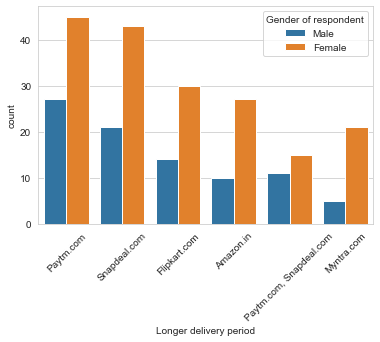

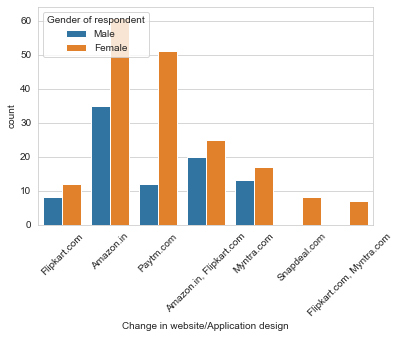

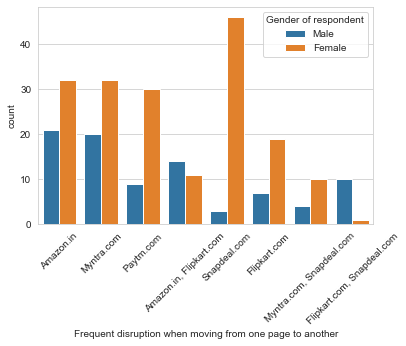

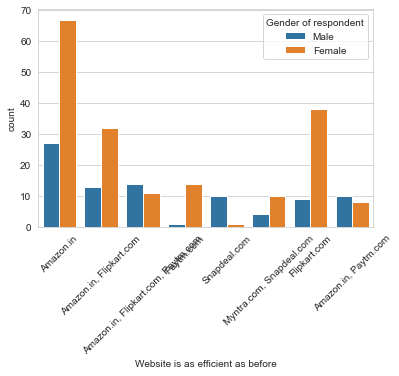

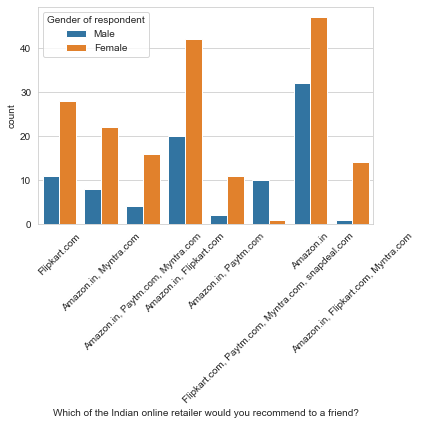

In [49]:
#checking respodents anwers based on gender
sns.set_style('whitegrid')
for i in df.columns:
    plt.figure(i)
    sns.countplot(df[i],hue=df['Gender of respondent'])
    plt.xticks(rotation=45)
    print("\n")
plt.show()

1.We can see that women respodent are more as per the diffreent age group.may be data collection focussed on woman groups.

2.Female respodents are more from Greater Noida and bangalore.It is covering more on the northern part.

3.Male respodents are more fromDelhi and Noida. 

4.Female respodent are shopping online for more than 4 years.

5.Female respodents are using mobile internet and wifi the most.They are using smartphone and laptop the most.
They use more debits/credits for payment option.They prefer to use search engine or app rather than url.

6.Women spend more time than men during online shopping and the time is mostly more than 15 mins.

7.Women too compare the products with other websites and is one of the reasons to abandon the cart without shopping.

8.Woman strongly belief that site design,merchandising,conviniece,security,responsiveness,trust,serviceability,choice
should be taken care of for better preospective of online shopping.

9.More women disagree that online shopping is a kind of adventure,fulfills certain roles,feeling of social status. So websites need to work towards giving real time experience as this can be a big marketing strategy.

10.Feedbacks will be analysed later.

# Bivariate Analysis

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

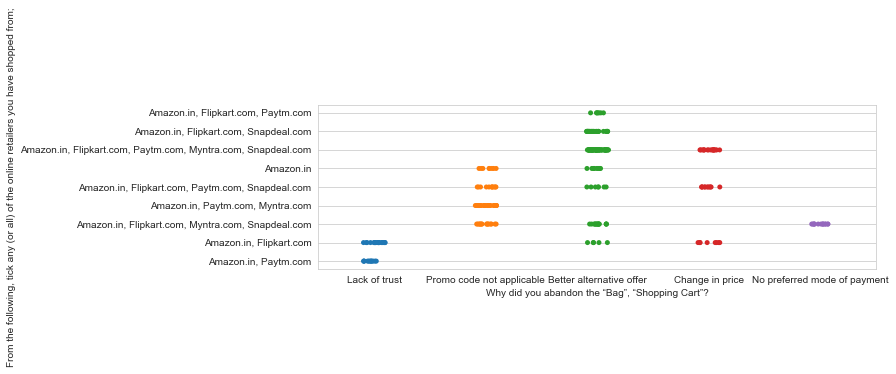

In [50]:
plt.figure(figsize=(10,3))
sns.stripplot(df['Why did you abandon the “Bag”, “Shopping Cart”?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'])

Thus we see that flipkart,amazon and paytm customers abondon the bag/shopping cart due to better alternative offer or
promo code not applicable.So this can result in mistrust.So we need to retain the customers by introducing some cashback/offers.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

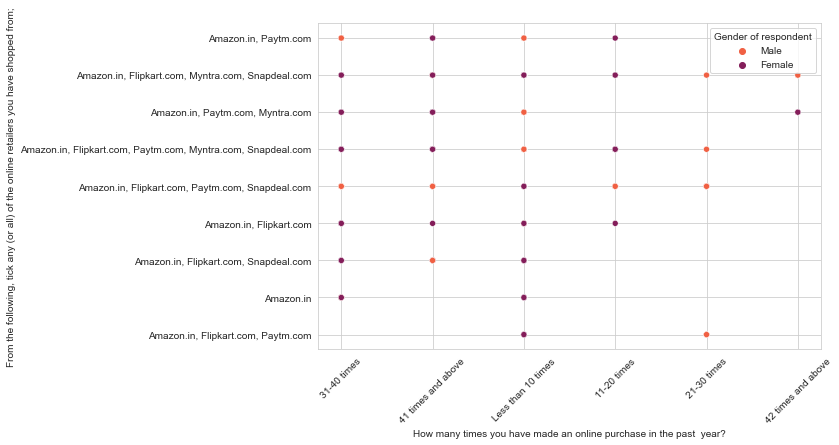

In [51]:
plt.figure(figsize=(9,6))
sns.scatterplot(df['How many times you have made an online purchase in the past  year?'],
              df['From the following, tick any (or all) of the online retailers you have shopped from;'],hue='Gender of respondent',data=df,palette='rocket_r')
plt.xticks(rotation=45)

Thus we can see that woman  respondent are more interested for repeat purchase than men respondent.
They have been doing repeat purchase for more than 31-40 times from all the retailers. some of the woman respodent who shop for 21-30 times and 11-20 times a year seem to exclude myntra.  

# Now we will be divind positive feedback and negative feedback into separate dataframe and analyse the same based on different retailers

We can see that after column 47, there are both positive and negative feedbacks of the websites, 
which are given by the respondents.We will be assesed those data by using data analysis process.

In [53]:
#using iloc function to extract the positive and negative feedbacks
feedback=df.iloc[:,47:]
feedback

From the following, tick any (or all) of the online retailers you have shopped from;                 Easy to use website or application                   Visual appealing web-page layout                   Wild variety of product on offer Complete, relevant description information of products Fast loading website speed of website and application          Reliability of the website or application                     Quickness to complete purchase            Availability of several payment options                   Speedy order delivery                  Privacy of customers’ information         Security of customer financial information                          Perceived Trustworthiness Presence of online assistance through multi-channel Longer time to get logged in (promotion, sales period) Longer time in displaying graphics and photos (promotion, sales period) Late declaration of price (promotion, sales period) Longer page loading time (promotion, sales period) Limited mode of payment on most products (promotion, sales period)   Longer delivery period Change in website/Application design Frequent disruption when moving from one page to another   Website is as efficient as before Which of the Indian online retailer would you recommend to a friend?
0                                 Amazon.in, Paytm.com                                                                            Paytm.com                                       Flipkart.com                                       Flipkart.com                                       Snapdeal.com                                           Snapdeal.com                                             Paytm.com                                          Paytm.com                                          Patym.com                               Amazon.in                                          Amazon.in                                          Amazon.in                                       Flipkart.com                                          Paytm.com                                           Amazon.in                                              Amazon.in                                                            Flipkart.com                                        Flipkart.com                                          Amazon.in                                Paytm.com                         Flipkart.com                                          Amazon.in                                 Amazon.in                                       Flipkart.com                  
1    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                                    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                              Amazon.in, Myntra.com                           Flipkart.com, Myntra.com                Amazon.in, Flipkart.com, Myntra.com                    Amazon.in, Flipkart.com, Myntra.com                                            Myntra.com               Amazon.com, Flipkart.com, Myntra.com                Amazon.in, Flipkart.com, Myntra.com                 Amazon.in, Flipkart.com                                         Myntra.com                                         Myntra.com                                         Myntra.com                Amazon.in, Flipkart.com, Myntra.com                             Amazon.in, Flipkart.com                                             Myntra.com                                                            snapdeal.com                                        Snapdeal.com                                       Snapdeal.com                             Snapdeal.com                            Amazon.in                                         Myntra.com                   Amazon.in, Flipkart.com                              Amazon.in, Myntra.com                  
2                     Amazon.in, Paytm.com, Myntra.com                                                     Amazon.in, Paytm.com, Myntra.com                   Amazon.in, Paytm.com, Myntra.com    

In [54]:
#dropping the negative feedbacks and creating dataframe positive feedbacks.
#A separate dataframe for displaying the positive feedback
df_positive=feedback.drop(["Longer time to get logged in (promotion, sales period)",
                   "Longer time in displaying graphics and photos (promotion, sales period)",
                   "Late declaration of price (promotion, sales period)",
                   "Longer page loading time (promotion, sales period)",
                   "Limited mode of payment on most products (promotion, sales period)",
                   "Longer delivery period", "Frequent disruption when moving from one page to another"], axis=1)
df_positive

From the following, tick any (or all) of the online retailers you have shopped from;                 Easy to use website or application                   Visual appealing web-page layout                   Wild variety of product on offer Complete, relevant description information of products Fast loading website speed of website and application          Reliability of the website or application                     Quickness to complete purchase            Availability of several payment options                   Speedy order delivery                  Privacy of customers’ information         Security of customer financial information                          Perceived Trustworthiness Presence of online assistance through multi-channel Change in website/Application design   Website is as efficient as before Which of the Indian online retailer would you recommend to a friend?
0                                 Amazon.in, Paytm.com                                                                            Paytm.com                                       Flipkart.com                                       Flipkart.com                                       Snapdeal.com                                           Snapdeal.com                                             Paytm.com                                          Paytm.com                                          Patym.com                               Amazon.in                                          Amazon.in                                          Amazon.in                                       Flipkart.com                                          Paytm.com                          Flipkart.com                           Amazon.in                                       Flipkart.com                  
1    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                                    Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                              Amazon.in, Myntra.com                           Flipkart.com, Myntra.com                Amazon.in, Flipkart.com, Myntra.com                    Amazon.in, Flipkart.com, Myntra.com                                            Myntra.com               Amazon.com, Flipkart.com, Myntra.com                Amazon.in, Flipkart.com, Myntra.com                 Amazon.in, Flipkart.com                                         Myntra.com                                         Myntra.com                                         Myntra.com                Amazon.in, Flipkart.com, Myntra.com                             Amazon.in             Amazon.in, Flipkart.com                              Amazon.in, Myntra.com                  
2                     Amazon.in, Paytm.com, Myntra.com                                                     Amazon.in, Paytm.com, Myntra.com                   Amazon.in, Paytm.com, Myntra.com                              Amazon.in, Myntra.com                   Amazon.in, Paytm.com, Myntra.com                                   Amazon.in, Paytm.com                      Amazon.in, Paytm.com, Myntra.com                  Amazon.com, Paytm.com, Myntra.com                              Patym.com, Myntra.com                               Amazon.in                                          Amazon.in                   Amazon.in, Paytm.com, Myntra.com                              Amazon.in, Myntra.com                                         Myntra.com                             Paytm.com                           Amazon.in                   Amazon.in, Paytm.com, Myntra.com                  
3    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...                                    Amazon.in, Flipkart.com, Paytm.com, Myntra.com...  Amazon.in, Flipkart.com, Paytm.com, Myntra.com...                            Amazon.in, Flipkart.com                            Amazon.in, Flipkart.com                  Amazon.in, Flipkart.com, Snapdeal.com                    Amazon.in, Flipkart.com, Paytm.com                Amazon.com, Flipkart.co

In [55]:
df_positive.shape

(269, 17)

In [56]:
for i in df_positive.columns:
    print(i)
    print(df_positive[i].value_counts())
    print("\n")

From the following, tick any (or all) of the online retailers you have shopped from;
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;, dtype: int64


Easy to use website or application
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com,

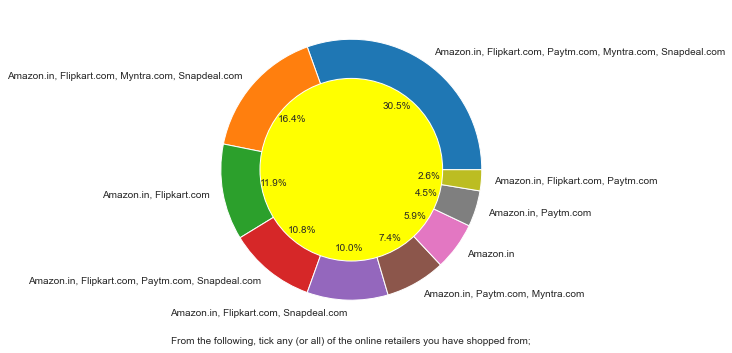

<Figure size 432x288 with 0 Axes>

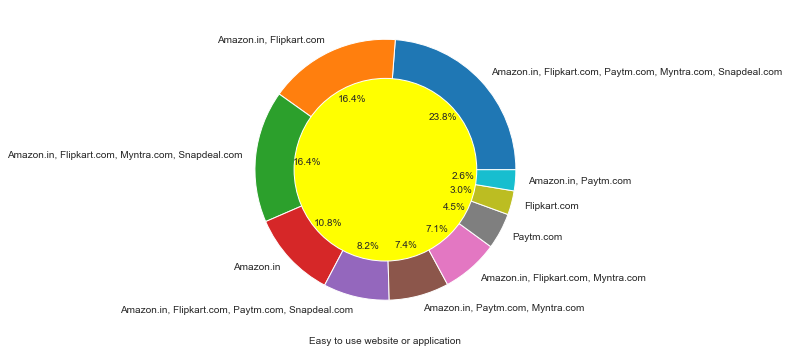

<Figure size 432x288 with 0 Axes>

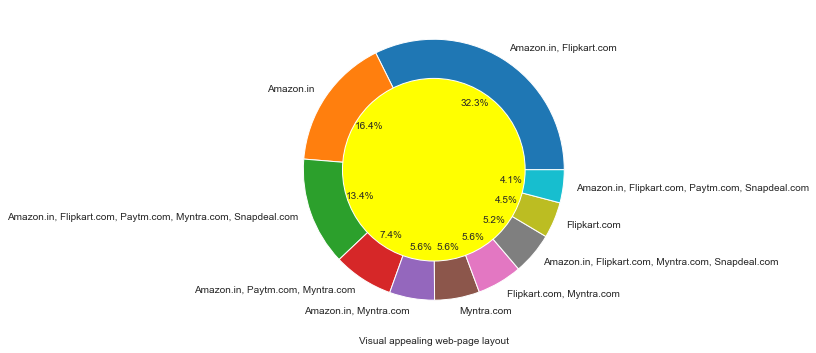

<Figure size 432x288 with 0 Axes>

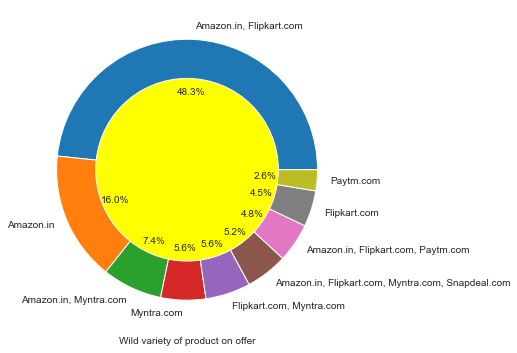

<Figure size 432x288 with 0 Axes>

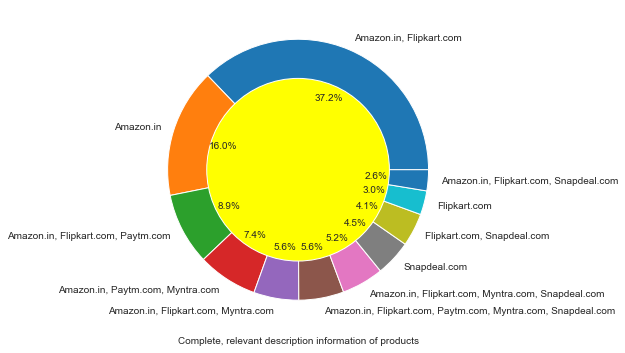

<Figure size 432x288 with 0 Axes>

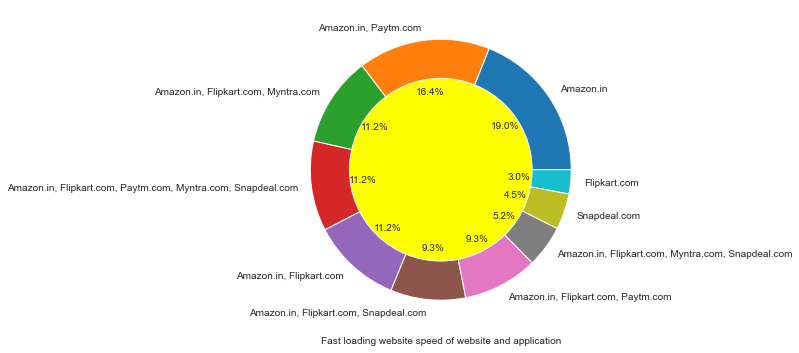

<Figure size 432x288 with 0 Axes>

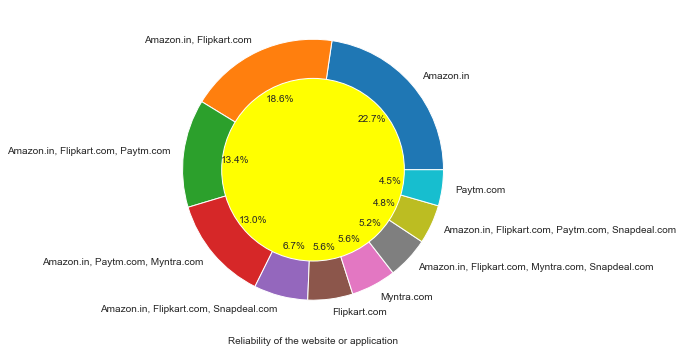

<Figure size 432x288 with 0 Axes>

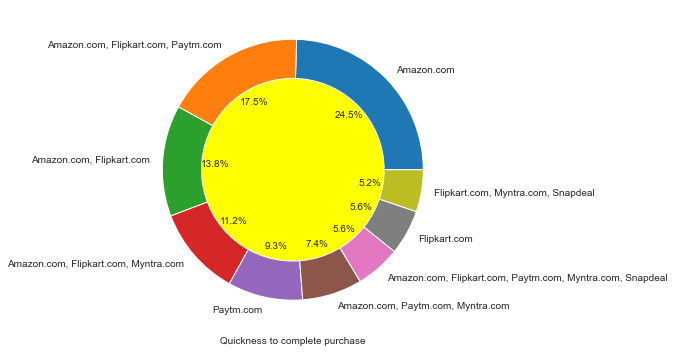

<Figure size 432x288 with 0 Axes>

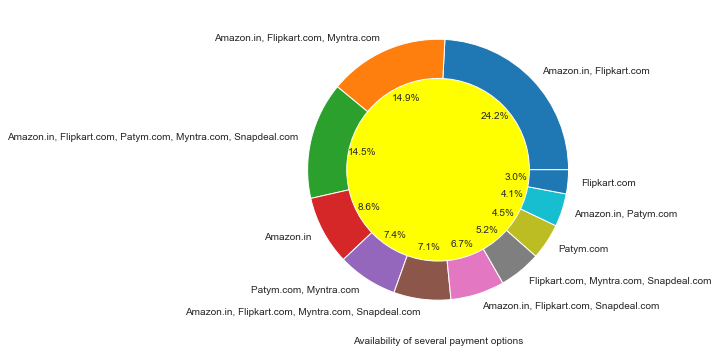

<Figure size 432x288 with 0 Axes>

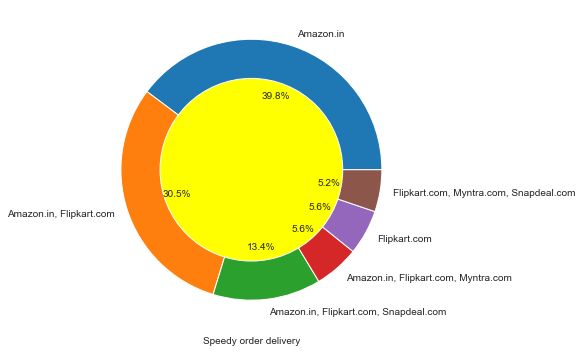

<Figure size 432x288 with 0 Axes>

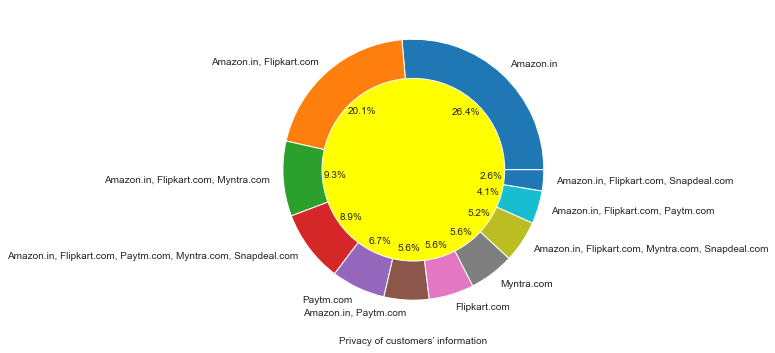

<Figure size 432x288 with 0 Axes>

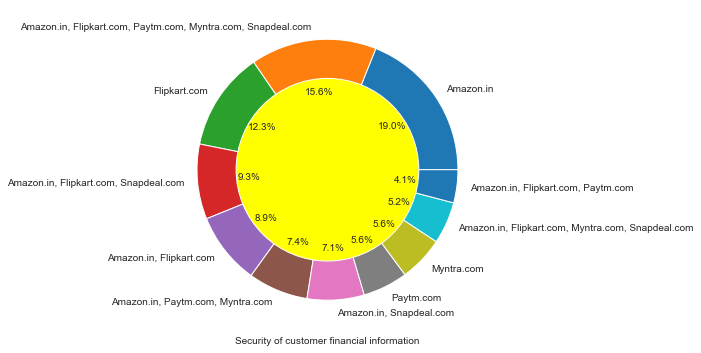

<Figure size 432x288 with 0 Axes>

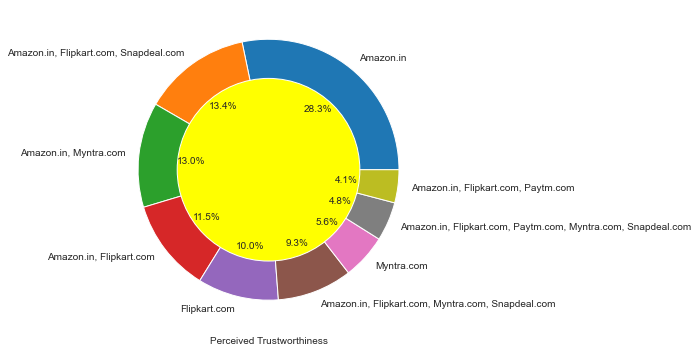

<Figure size 432x288 with 0 Axes>

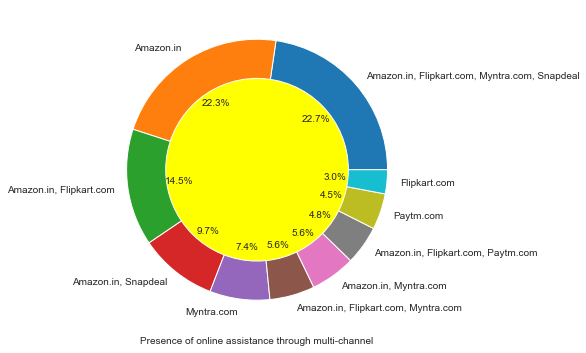

<Figure size 432x288 with 0 Axes>

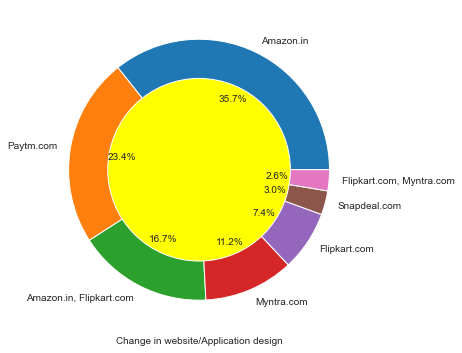

<Figure size 432x288 with 0 Axes>

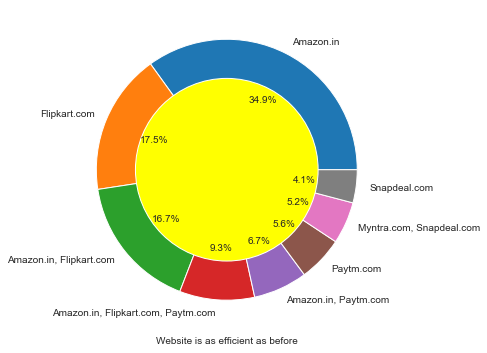

<Figure size 432x288 with 0 Axes>

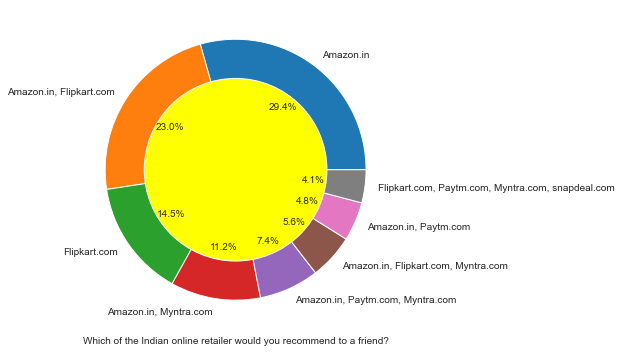

<Figure size 432x288 with 0 Axes>

In [57]:
for i in df_positive:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='yellow')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

OBSERVATION:
 Thus we see that Amazon, Flipkart scored the highest votes for having all the positive 
points and have maintained a very good brand image followed by paytm and the myntra   

In [58]:
for i in df_negative.columns:
    print(i)
    print(df_negative[i].value_counts())
    print("\n")

NameError: name 'df_negative' is not defined

We can see there are 297 rows and 7 columns of negative feedback. 

In [ ]:
for i in df_negative:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='yellow')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

# Negative Feedbacks

1.Respondents have voted 21.2 % to Amazon for longer time to get logged in followed by paytm.

2.Respondents have voted 22.35 %to amazon and flipkart for longer time in displaying graphics and photos.

3.Respondents have voted 27.9% to myntra for late decralation of price followed by paytm.

4.Respondents have voted 22.7% to myntra for longer page loadting time followed by paytm.

5.respondents have voted 32.3% to Snapdeal for limited mode of paymnet on most products.

6.Respondents have voted 26.% to paytm followed by snapdeal at 23.8% for longer delivery period.

7.Respondnets have voted 19.7% to amazon followed by 19.3% to myntra and snapdeal at 18.2% for frequent disruption when
moving from one page to another.


In [ ]:
for i in df_negative:
    plt.figure(figsize=(8,6))
    sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
    plt.xticks(rotation=45)
    plt.figure()

Customers seem to be more loyal to amazon, flipkart and paytm as even though many of them have given negative remarks
about them still they would prefer and recommend these platforms to their friend.

Conclusion :
Recommendation and Suggestion 
1. Amazon.com
Suggestion for imrpvement:
a)Load Time for website & longer time for displaying graphics:The faster the website's load time is, the happier the customers/visitors will be. when we optimize the web page's load time, then we can expect to see improvements in user experience (UX),conversion rates, and ultimately, sales revenue.So there are  online tools available which allow to test website’s page speed timely and necessary steps can be taken as website load times impact conversion rates and, as a result, the business as a whole.

b)There should be timely decralarion of price during promotion/sales else in no time customers can switch to other brands. Remember if you don’t promote it properly in time, you’re likely to miss out on opportunities.


c)Reduce the delivery time of the products:Fast and affordable shipping options is a must. By implementing a distributed inventory model, retailers can easily reduce shipping costs and transit times in order to meet customer expectations.
Finding ways to offer free shipping has been proven to improve sales conversations and reduce cart abandonment.

Positive feedback summary:

Easy to use website/application.

wide variry of product offereig.

complete and relevant descripotion of product,

reliability of website and perceived trust worthneess,

several payment options and enhanced security

Fast delivery of products.

Presence of online assistance through multi-channels.


2. Flipkart.com
Suggestion for  improved:

a)Load time for websiteand longet time for displaying graphics should be decreased as explained above.

b)Declaration of prices during sales promotion should be timely and not hidden as customers will take no time to switch to other brands.Retailer can also introduce intruductory price offer on releasing new product

c)Avialbility of more payment options to customers as this will give customers wider options for payment.

d)Reduce the delivery time of the products by impoving logistic .

Positive feedback summary:

Easy to use website/application.

wide variry of product offering.

complete and relevant descripotion of product,

reliability of website and perceived trust worthneess,

several payment options and enhanced security

Fast delivery of products.

Presence of online assistance through multi-channels

Wide variety of products to offer.

3. Myntra.com
Suggestion for improved:
Longer page loading :Retailers should try to improve webiste loading speed by checking with online tools available and optimise the webpage speed.

Frequent disruption when moving from one page to another :This result can cause users to bounce or leave the site and drops cu customer base massively.

Declaration of price should be upfront and in time.

Positive feedback summary:

Convenient and a good website.

Availability of several payment options.

Faster products delivery.

Complete information of products available.

Reliable website or app, perceived trustworthiness and good Security.

Wide variety of product to offer

4. Paytm.com
Suggestion for improvement:

1.Reduce the delivery time of the products during promotions by introducing variety of delivery options like same day delivery,two day delivery and choosing a good logistic comapny.They can also offer free delivery.

2.Retailers sould avoid late declaration of prises and may follow by introducing early Bird Pricing Strategy .Early bird pricing provides savings for attendees who are willing to shop your products early, sometimes even before plans are finalized.

3.Website page loading and longer time to display graphics should be imrpved and taken care of.

4.Frequent disturbance is occurring while moving from one page to another.

Positive feedback summary

Convenient to use and a good website

Quickness to complete a purchase.

customers feel that either web or app is reliable.

wild variety of products on offer.

Reliability

5. Snapdeal.com
To be improved:
Reduce the delivery time of the products during promotions as expalined above.

Avoid giving late declaration of prices.

Website page loading should be improved.

Longer delivery period should be curtailed and improved.

No one has expressed to recommend snapdeal to a contact as it has the most negative feedbacks among all other websites.

Positive feedback summary:
Convenient to use.

financial information security.

Presence of online assistance through multi-channels

Recommendations to all the e-commerce websites

Information Quality:Improve e-commerce website design by optimise your product imagery,enable your customers to easily find what they need,ensure the  product information is accurate,include customer remarks.

service quality:excellence in service quality include personalized service, good return policies, complaints desks and hotlines,Responsiveness.We need to take care of it as customer is king.The core task of a business is to ensure that customers come back, which can be done by delivering excellent service quality.Personalized service is a key way to retain customers, because you show them that they are more than just a source of income to you 

system quality:There should not be errors in the website pages,slow loading pages as web shoppers have become more sopisticated in the knowledge of online purchasing alternatives,and more importantly,they hav ebecome less patience in with websites that are difficult to understand and used.Users expect to  process the information efficiently and with little effort.Ecoomerce webiste if ignores this facts may face risk in lossing the valuable customers base. There is also the need to provide quality services free of interruptions and hindrances.

Trust : It is key factor for any retailers .If trust is there ,then the customers will repurchase a particular product or set of products in a routinized or habitual fashion.

net benefit: Web shopping provides with the opportunity to reach more and new customers and retaining the existing ones by introdcuing schemes like discount offers,special deals,early bird price strategies,by inviting them to special trial for personalised experience,by gicing them cashback etc

Majority of the customers are working class women and their age is between 20-40. Always bring variety of products targetting them.

Provide more customer friendly approach like fast delivery, complaint resolution, etc.

We recommended some suggestions for the websites to improve further in the future by analalysing the dataset by using data analysis approach .We can further build models like classification models e.g Random forect classifier,Adaboost classifier to predict the accuracy of brand recommendtaion by customers as the target variable and simultenously can do features importance.

# Multivariate Analysis

In [64]:
#in order to perform multivariate analysis,i would hvae to convert the categorical columns into numeric datatype.so i will be 
#doing orinal encoding.
x=df.copy()
x.drop('Which of the Indian online retailer would you recommend to a friend?',axis=1,inplace=True)
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [65]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oe=OrdinalEncoder()
le=LabelEncoder()

In [74]:
cat=[i for i in x.columns if x[i].dtypes=='O']

In [75]:
#using ordinal encoder for independent features
for i in cat:
    x[i]=oe.fit_transform(x[i].values.reshape(-1,1))

#Using label encoder for Label Column
y=le.fit_transform(y)

In [ ]:
sns.pairplot(x)